In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# OverView of dataset

### The Features of this dataset include:

**Numeric Features**

FCVC = 'Frequent consumption of high caloric food'

NCP = 'Number of main meals'

CH2O = 'Consumption of water daily'

FAF = 'Physical activity frequency'

TUE = 'Time using technology devices'


**Categoric Features**

FACV = 'Frequency of consumption of vegetables'

CAEC = 'Consumption of food between meals'

SMOKE = 'Smoker or not'

SCC = 'Calories consumption monitoring'

CALC = 'Consumption of alcohol'

MTRANS = 'Transportation used'

**Target Features**

NObesity values are:

Underweight Less than 18.5

Normal 18.5 to 24.9

Overweight 25.0 to 29.9

Obesity I 30.0 to 34.9

Obesity II 35.0 to 39.9

Obesity III Higher than 40

# Import the required libraires

In [2]:
import numpy as np
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
import lightgbm
from lightgbm import LGBMClassifier


# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Checking and Loading the Dataset

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

In [4]:
df_train.head() #checking overview of train data

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [5]:
df_test.head() #checking overview of test data

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [6]:
#merge the train and test data
all_data = pd.concat([df_train,df_test])

all_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [7]:
#taking the full information of dataset in short
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34598 entries, 0 to 13839
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Gender                          34598 non-null  object 
 2   Age                             34598 non-null  float64
 3   Height                          34598 non-null  float64
 4   Weight                          34598 non-null  float64
 5   family_history_with_overweight  34598 non-null  object 
 6   FAVC                            34598 non-null  object 
 7   FCVC                            34598 non-null  float64
 8   NCP                             34598 non-null  float64
 9   CAEC                            34598 non-null  object 
 10  SMOKE                           34598 non-null  object 
 11  CH2O                            34598 non-null  float64
 12  SCC                             34598

In [8]:
#Getting statistical summary of numeric data
all_data.describe()

id           Age        Height        Weight          FCVC  \
count  34598.000000  34598.000000  34598.000000  34598.000000  34598.000000   
mean   17298.500000     23.886181      1.699721     87.686451      2.444704   
std     9987.726643      5.733207      0.087895     26.273493      0.532568   
min        0.000000     14.000000      1.450000     39.000000      1.000000   
25%     8649.250000     20.000000      1.631856     66.000000      2.000000   
50%    17298.500000     22.851747      1.700000     84.000000      2.392179   
75%    25947.750000     26.000000      1.761773    111.539494      3.000000   
max    34597.000000     61.000000      1.980000    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  34598.000000  34598.000000  34598.000000  34598.000000  
mean       2.757043      2.030469      0.978861      0.614467  
std        0.707610      0.609566      0.839122      0.604475  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.784710      0.006892      0.000000  
50%        3.000000      2.000000      1.000000      0.555591  
75%        3.000000      2.550570      1.583832      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [9]:
# Get the Statistical summary of the category columns

all_data.describe(include='object')

Gender family_history_with_overweight   FAVC       CAEC  SMOKE    SCC  \
count    34598                          34598  34598      34598  34598  34598   
unique       2                              2      2          4      2      2   
top     Female                            yes    yes  Sometimes     no     no   
freq     17387                          28398  31565      29218  34173  33447   

             CALC                 MTRANS        NObeyesdad  
count       34598                  34598             20758  
unique          4                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        25045                  27798              4046

# Data Cleaning 

In [10]:
#checking the missing value from train data
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**We didn't get any missing value for train dataset.So, we are good**

In [11]:
#checking missing value for test data
df_test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

**We didn't get any missing value for test dataset.So, we are good**

In [12]:
# Check the duplicate values

all_data.duplicated().sum()

0

**No duplicate values**

In [13]:
# Remove unneccessary column

all_data.drop('id',axis=1,inplace=True) 

all_data.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

# EDA - Exploratory Data Analysis

In [14]:
# checking the total number of each types in 'NObeyesdad' column (target column) for better understanding of data

all_data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

Text(0.5, 1.0, 'The distribution of Obesity risk')

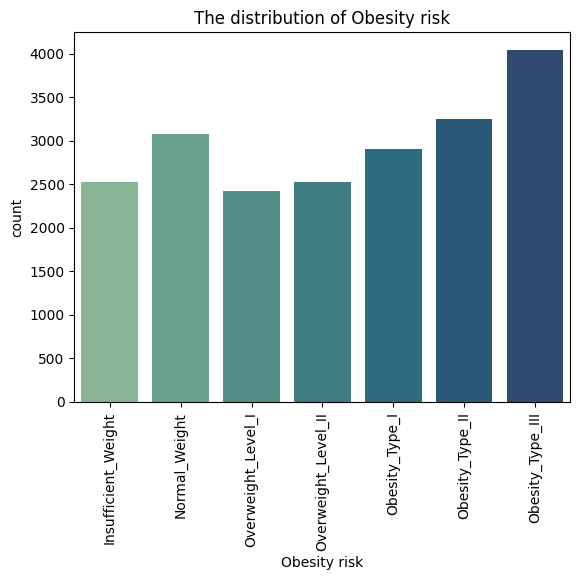

In [15]:
# Creating a bar chart to see how many examples we have of each types

# Sort the order of 'NObeyesdad' column 
order = ['Insufficient_Weight', 
         'Normal_Weight', 
         'Overweight_Level_I', 
         'Overweight_Level_II', 
         'Obesity_Type_I', 
         'Obesity_Type_II', 
         'Obesity_Type_III']

sns.countplot(data = all_data, 
              x = 'NObeyesdad', 
              order = order,
              palette = 'crest')

# Add some text for label, title 
plt.xlabel('Obesity risk')
plt.xticks(rotation=90)
plt.title('The distribution of Obesity risk')

In [16]:
# Create histogram to see univariate distributions of each feature 

#all_data.hist()

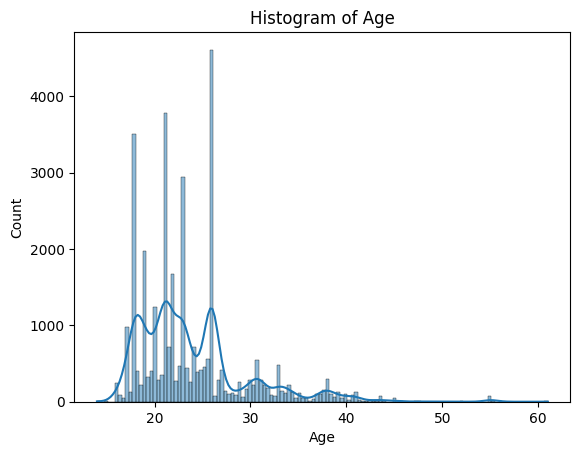

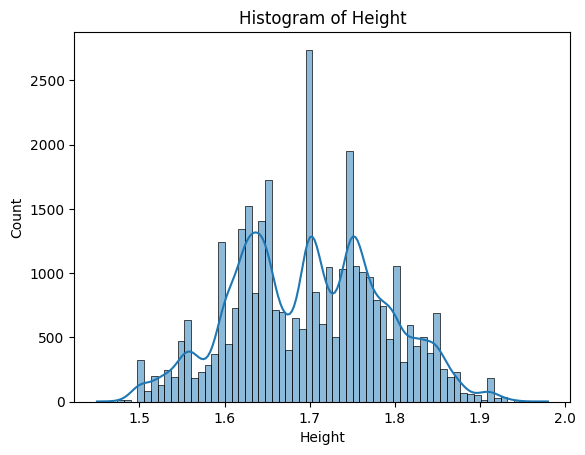

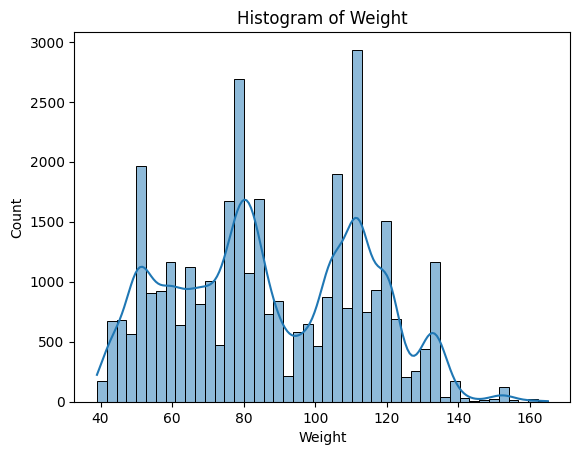

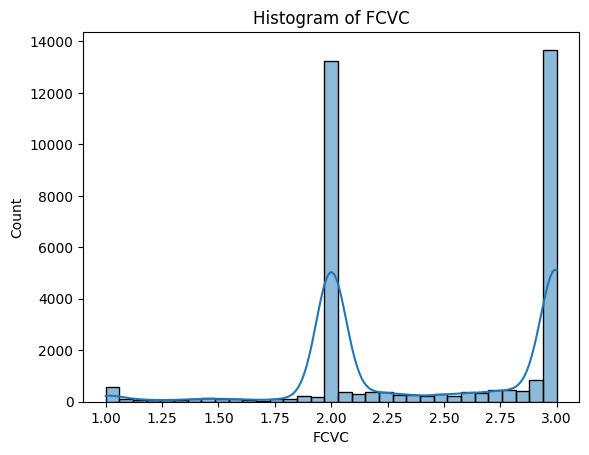

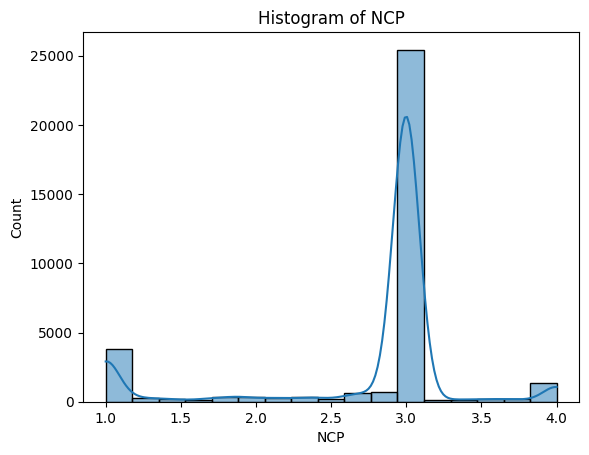

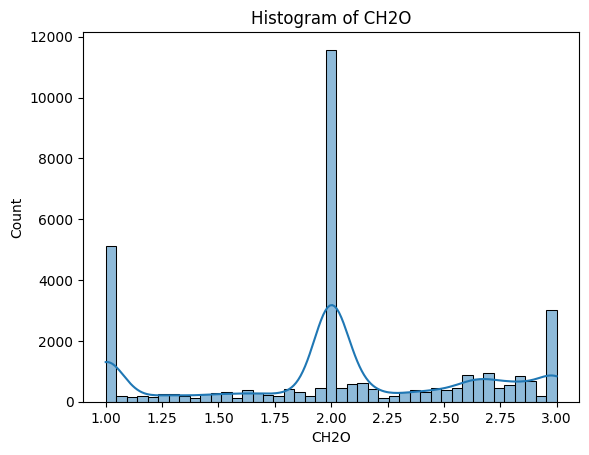

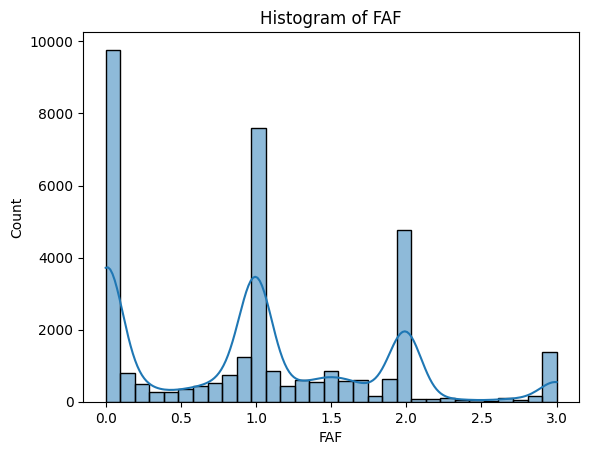

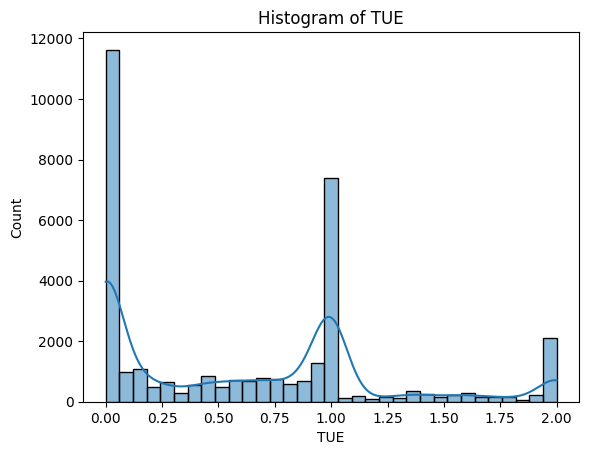

In [17]:
# Create histogram and kde to see univariate distributions of each feature 

features = all_data.select_dtypes('number')

for feature in features:
    sns.histplot(data=all_data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

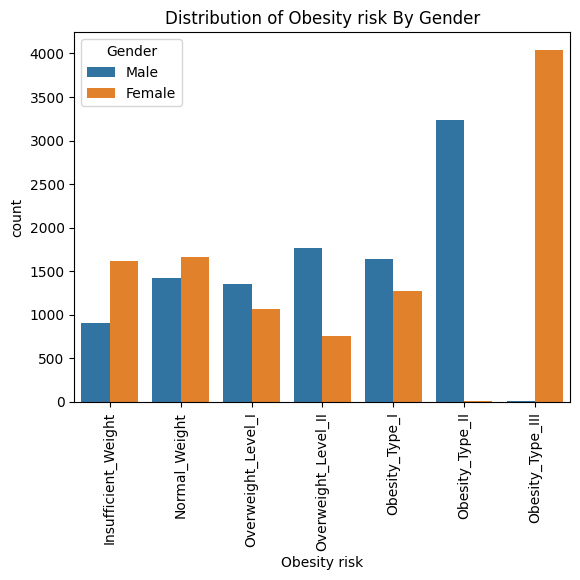

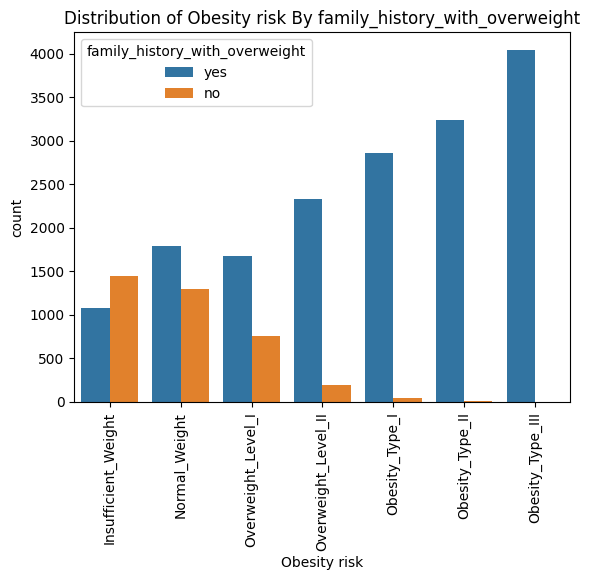

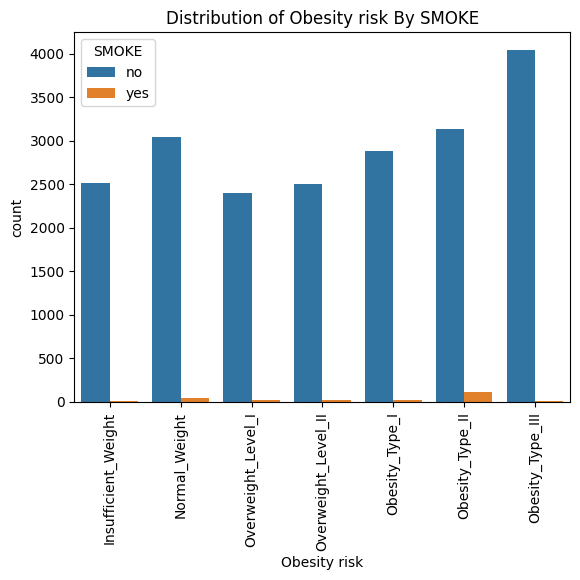

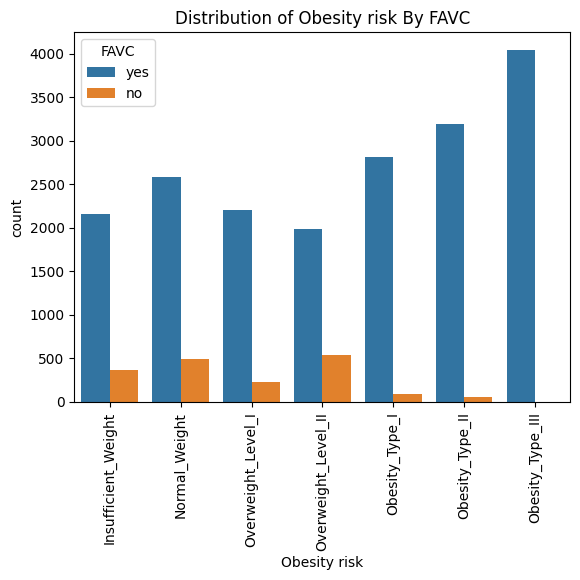

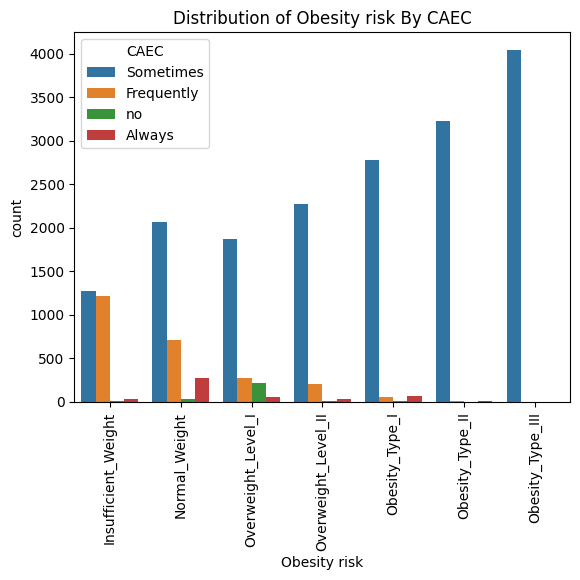

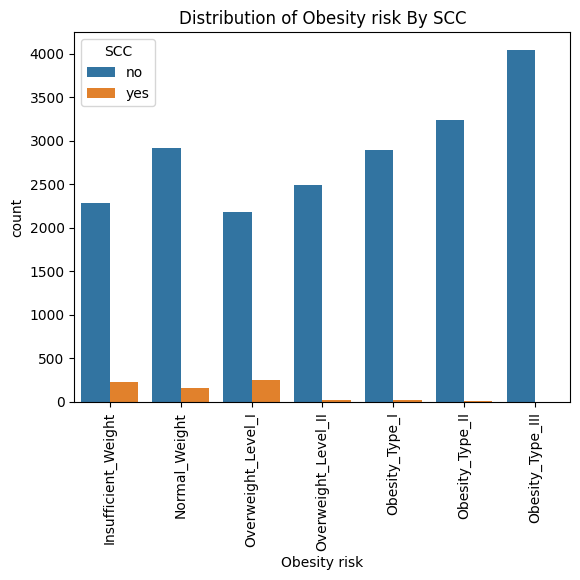

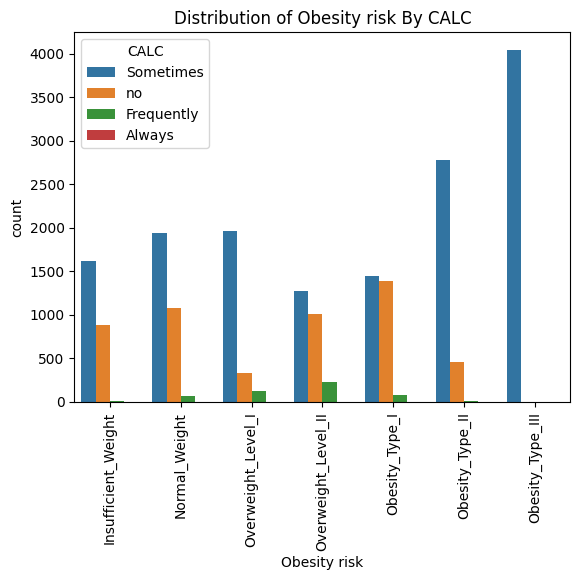

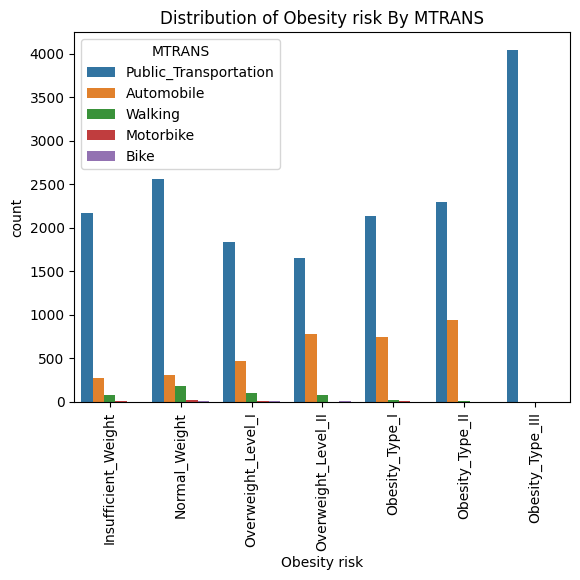

In [18]:
# Create bar chart to see the distributions of Obesity risk in 'Categoric features' 

categoric_features = ['Gender','family_history_with_overweight','SMOKE','FAVC','CAEC','SCC','CALC','MTRANS']

for feature in categoric_features:
    sns.countplot(data=all_data, x='NObeyesdad',order=order, hue=feature)
    
    # Add some text for labels, title 
    plt.xticks(rotation=90)
    plt.xlabel('Obesity risk')
    plt.title(f'Distribution of Obesity risk By {feature}')
    plt.show()

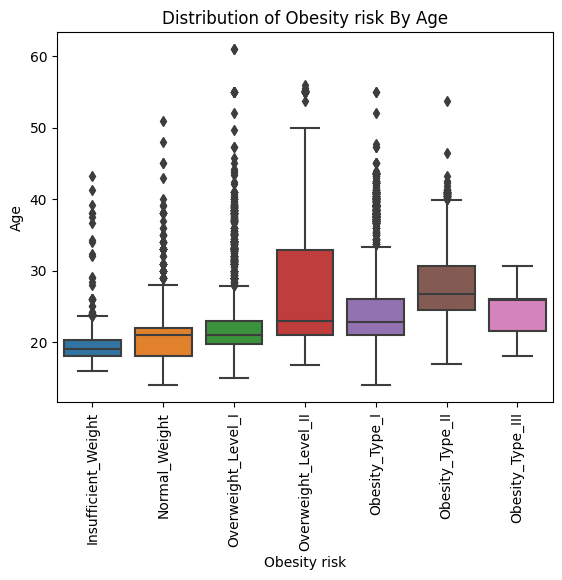

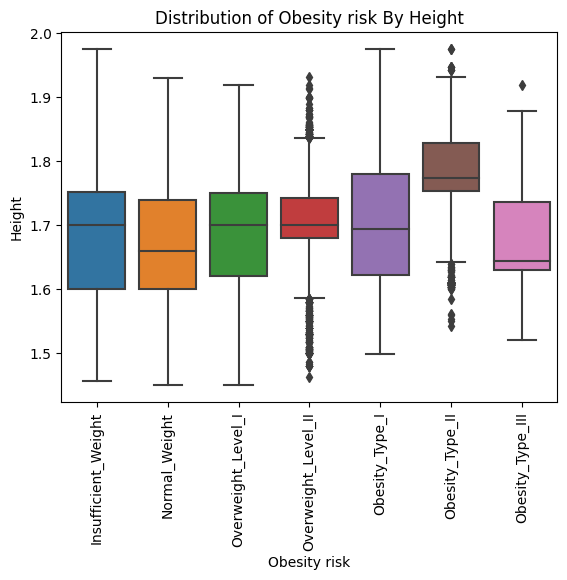

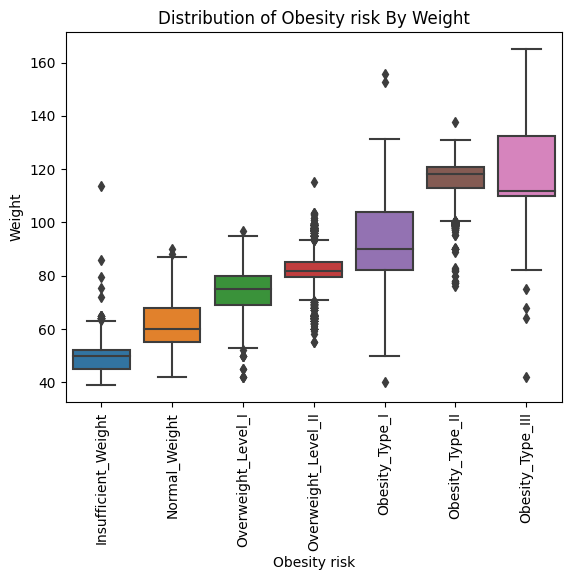

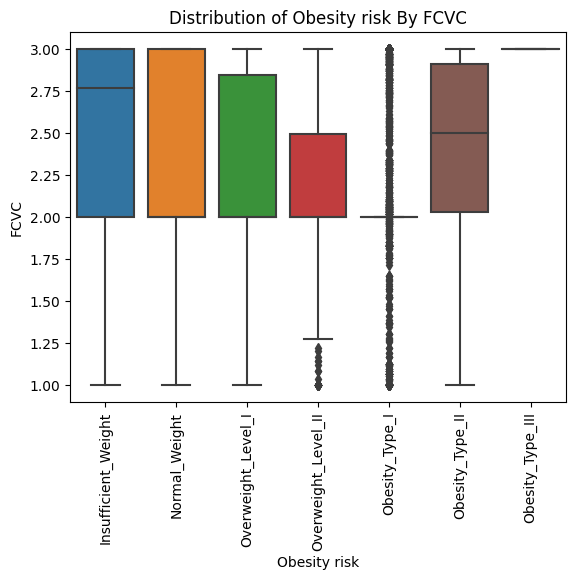

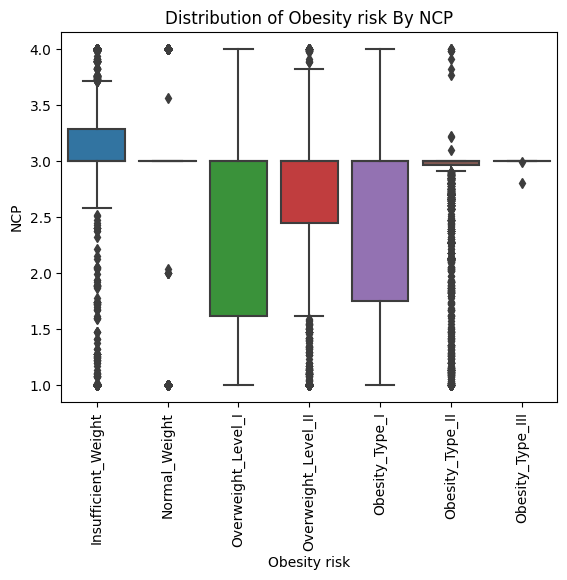

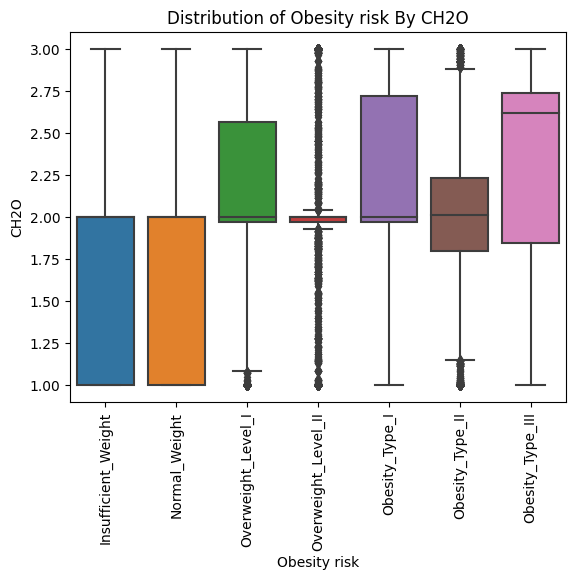

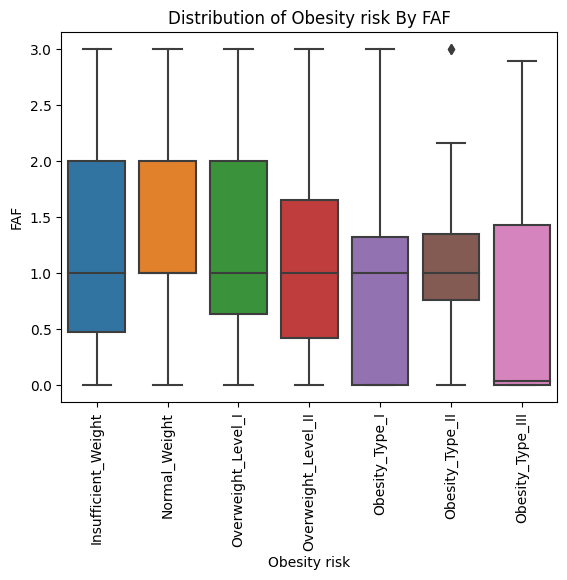

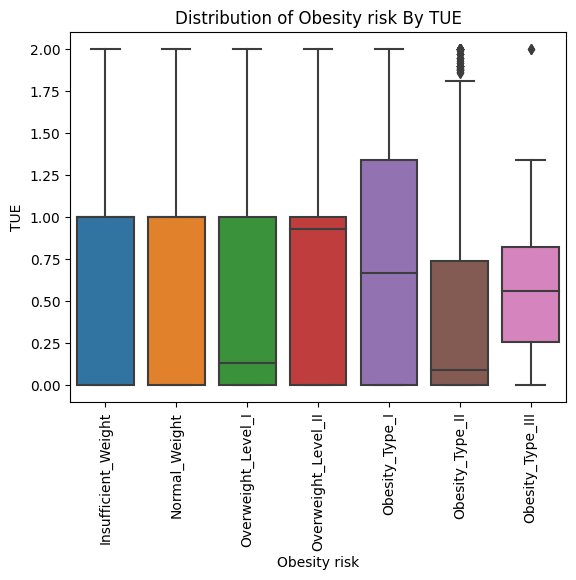

In [19]:
# Create box plot to see the distributions of Obesity risk in 'Numeric features' 

numeric_features = all_data.select_dtypes('number')

for feature in numeric_features:
    sns.boxplot(data=all_data, x='NObeyesdad',y=feature, order=order)
    
    # Add some text for labels, title 
    plt.xticks(rotation=90)
    plt.xlabel('Obesity risk')
    plt.title(f'Distribution of Obesity risk By {feature}')
    plt.show()
    

# Note : also can change to violin plot by this code
# sns.violinplot(data=all_data, x='NObeyesdad',y=feature, order=order)

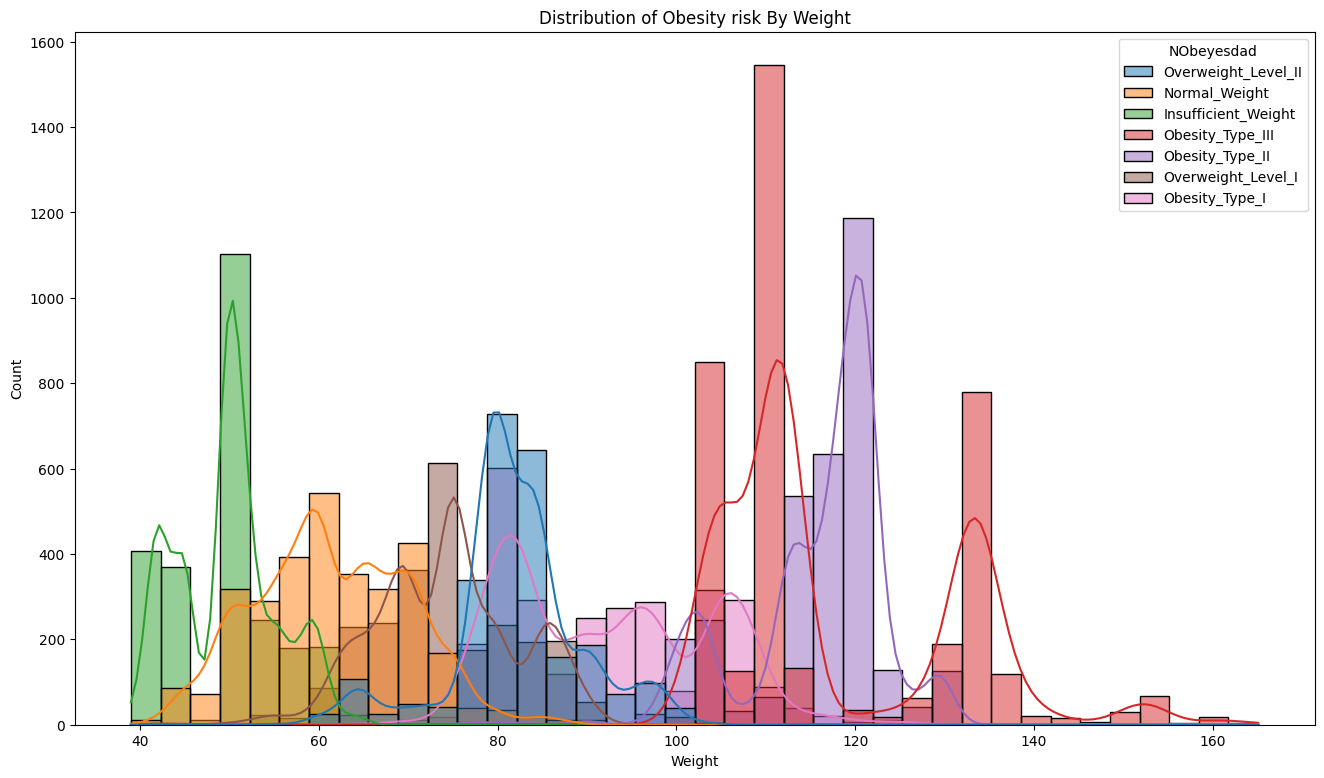

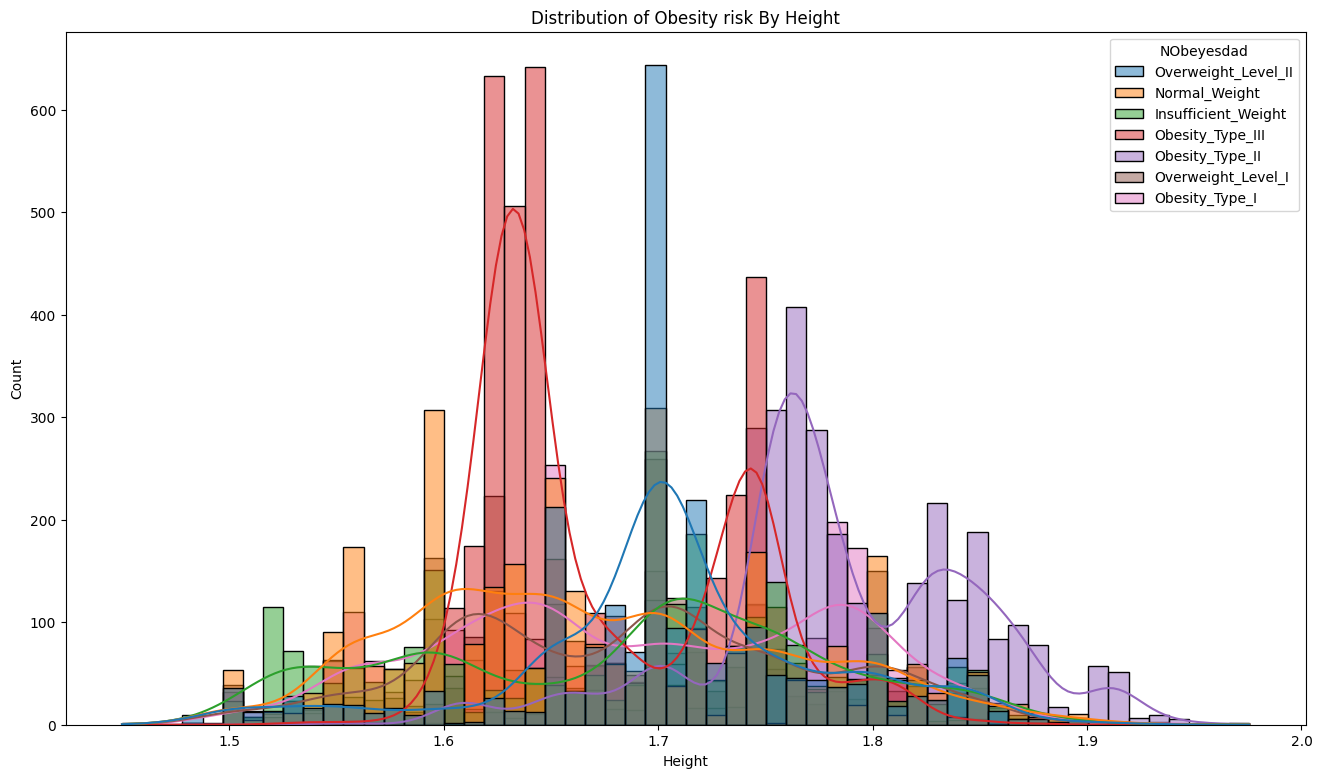

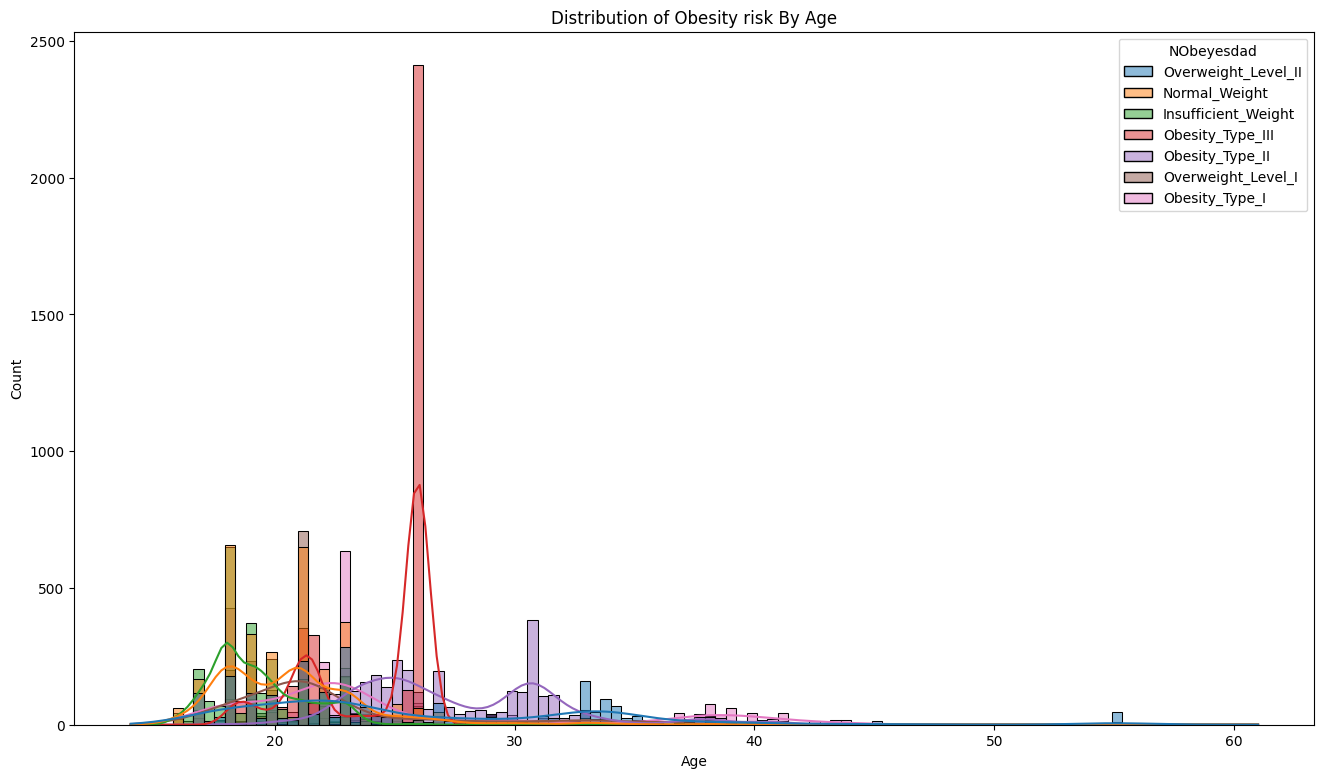

In [20]:
# Create histogram and kde to see the distributions of 'Age','Weight','Height' features

features = ['Weight','Height','Age']

for feature in features:
    plt.figure(figsize=(16,9))
    sns.histplot(data=all_data, x=feature,hue='NObeyesdad', kde=True)
    plt.title(f'Distribution of Obesity risk By {feature}')
    plt.show()

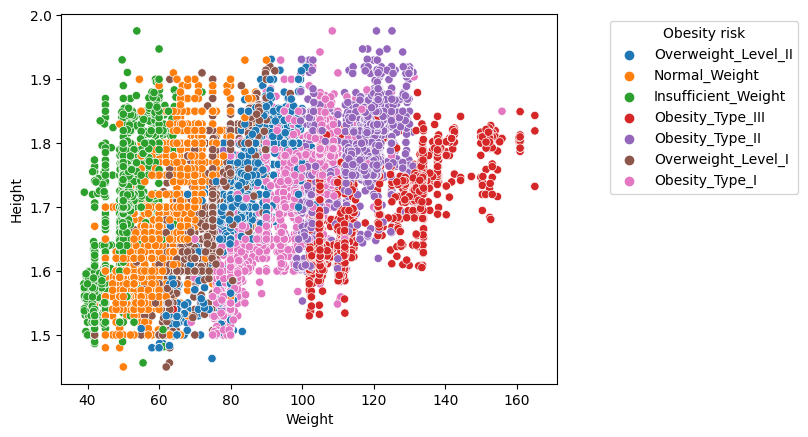

In [21]:
# Create a scatterplot of the 'NObeyesdad' feature

sns.scatterplot(data=all_data, x='Weight', y='Height', hue='NObeyesdad')

plt.legend(title='Obesity risk',loc='upper right', bbox_to_anchor=(1.5, 1))

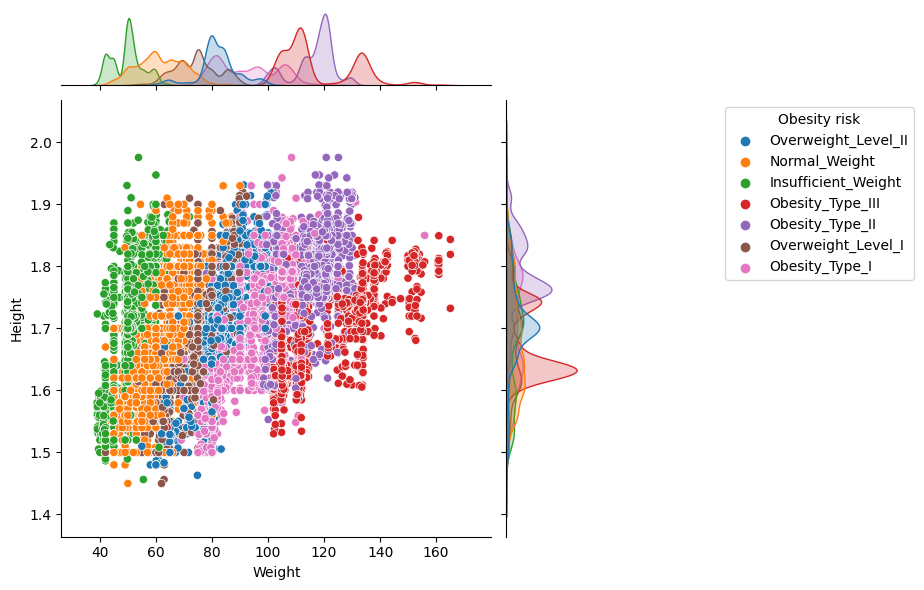

In [22]:
# Try to use the seaborn's jointplot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x='Weight', y='Height', hue='NObeyesdad', data=all_data)

plt.legend(title='Obesity risk',loc='upper right', bbox_to_anchor=(2, 1))

In [23]:
# Create 3D Scatter Plots

fig = px.scatter_3d(all_data, x='NObeyesdad', y='Height', z='Weight', color='NObeyesdad', opacity=0.75)

fig.update_layout(title='3D Scatter plot Matrix: Weight vs Height vs Obesity risk',
                     width=1000, height=1000,
                     paper_bgcolor='rgb(243,243,243)',
                     plot_bgcolor='rgb(243,243,243)')
fig.show()

In [24]:
# Create 3D Scatter Plots

fig = px.scatter_3d(all_data, x='NObeyesdad',y='Weight', z='Age', color='NObeyesdad', opacity=0.75)

fig.update_layout(title='3D Scatter plot Matrix: Weight vs Age vs Obesity risk',
                     width=1000, height=1000,
                     paper_bgcolor='rgb(243,243,243)',
                     plot_bgcolor='rgb(243,243,243)')
fig.show()

# Feature Scaling

In [25]:
# Create 'BMI' feature

all_data['BMI'] = all_data['Weight'] / (all_data['Height'] ** 2)

all_data.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  28.259565  
1  1.000000         no             Automobile        Normal_Weight  23.422091  
2  1.673584         no  Public_Transportation  Insufficient_Weight  17.126706  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  44.855798  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  25.599151

1. `all_data['BMI'] = all_data['Weight'] / (all_data['Height'] ** 2)`: This line creates a new column in the `all_data` DataFrame called `'BMI'`. It calculates the BMI by dividing the weight (presumably in kilograms) by the square of the height (presumably in meters). The formula for BMI is weight (in kilograms) divided by height (in meters) squared.

2. `all_data.head()`: This line simply displays the first few rows of the `all_data` DataFrame, including the newly added `'BMI'` column, allowing you to visually inspect the changes made to the dataset.

So, overall, this code calculates and adds a new column named `'BMI'` to the `all_data` DataFrame, containing the BMI values calculated based on the weight and height information already present in the DataFrame.

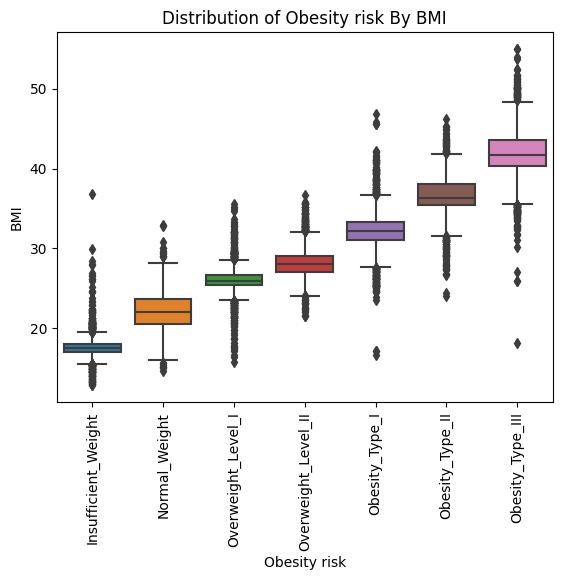

In [26]:
# Create box plot to see the distributions of Obesity risk By BMI

sns.boxplot(data=all_data, x='NObeyesdad',y='BMI', order=order)

plt.xticks(rotation=90)
plt.xlabel('Obesity risk')
plt.title('Distribution of Obesity risk By BMI')
plt.show()

Text(0.5, 1.0, 'Distribution of BMI by Obesity risk')

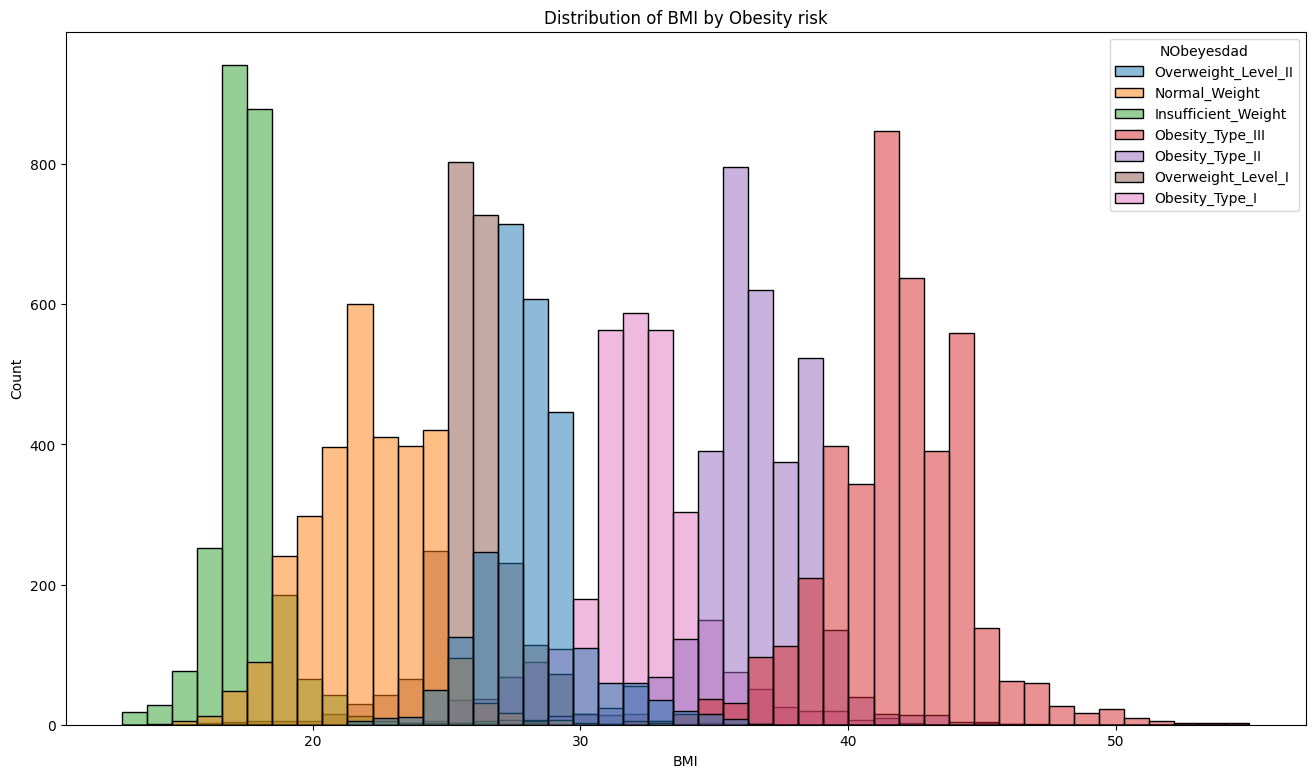

In [27]:
# Create histogram to see the distributions of Obesity risk By BMI

plt.figure(figsize=(16,9))

sns.histplot(data=all_data,x='BMI', hue='NObeyesdad')

plt.title('Distribution of BMI by Obesity risk')

# Data Pre-Processing

In [28]:
all_data.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  28.259565  
1  1.000000         no             Automobile        Normal_Weight  23.422091  
2  1.673584         no  Public_Transportation  Insufficient_Weight  17.126706  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  44.855798  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  25.599151

In [29]:
# Change the label of the target and make sure we can convert them back for submission

map_target = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6,
             }

all_data['NObeyesdad'] = all_data['NObeyesdad'].map(map_target)

all_data.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS  NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation         3.0  28.259565  
1  1.000000         no             Automobile         1.0  23.422091  
2  1.673584         no  Public_Transportation         0.0  17.126706  
3  0.780199  Sometimes  Public_Transportation         6.0  44.855798  
4  0.931721  Sometimes  Public_Transportation         3.0  25.599151

1. `map_target` is a dictionary where the keys are the original labels ('Insufficient_Weight', 'Normal_Weight', etc.) and the values are the corresponding numerical representations (0, 1, 2, etc.). This dictionary defines the mapping between the original labels and the numerical values.

2. `all_data['NObeyesdad'].map(map_target)` applies this mapping to the 'NObeyesdad' column in the DataFrame 'all_data'. It replaces each original label with its corresponding numerical value according to the 'map_target' dictionary. This operation effectively converts the categorical labels into numerical representations.

3. `all_data['NObeyesdad'] = all_data['NObeyesdad'].map(map_target)` assigns the result of the mapping operation back to the 'NObeyesdad' column in the DataFrame 'all_data', effectively replacing the original categorical labels with their numerical representations.

4. Finally, `all_data.head()` is used to display the first few rows of the DataFrame 'all_data' after the label encoding operation has been performed. This allows you to see the changes that have been made to the 'NObeyesdad' column.

Overall, this code is converting categorical labels into numerical values using label encoding, which is a common preprocessing step in machine learning tasks.

In [30]:
# Change the label of categoric features

encoder = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for column in columns_to_encode:
    all_data[column] = encoder.fit_transform(all_data[column])

all_data.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
0       1  24.443011  1.699998   81.669950                               1   
1       0  18.000000  1.560000   57.000000                               1   
2       0  18.000000  1.711460   50.165754                               1   
3       0  20.952737  1.710730  131.274851                               1   
4       1  31.641081  1.914186   93.798055                               1   

   FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0     1  2.000000  2.983297     2      0  2.763573    0  0.000000  0.976473   
1     1  2.000000  3.000000     1      0  2.000000    0  1.000000  1.000000   
2     1  1.880534  1.411685     2      0  1.910378    0  0.866045  1.673584   
3     1  3.000000  3.000000     2      0  1.674061    0  1.467863  0.780199   
4     1  2.679664  1.971472     2      0  1.979848    0  1.967973  0.931721   

   CALC  MTRANS  NObeyesdad        BMI  
0     2       3         3.0  28.259565  
1     3       0         1.0  23.422091  
2     3       3         0.0  17.126706  
3     2       3         6.0  44.855798  
4     2       3         3.0  25.599151

<Axes: >

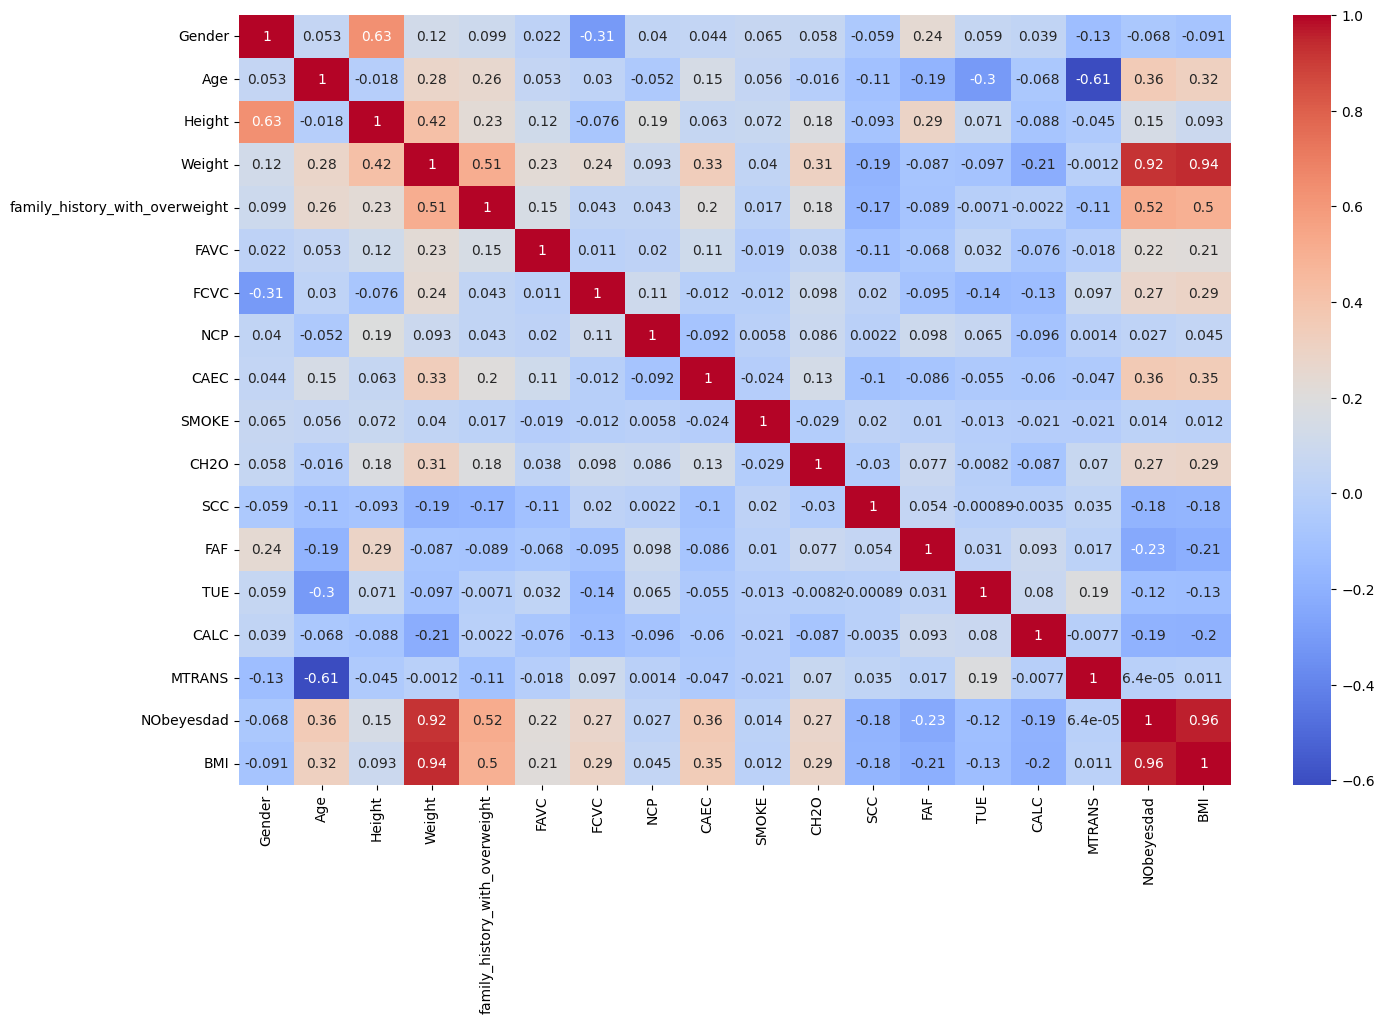

In [31]:
# Correlation between variables

plt.figure(figsize=(16,10))

sns.heatmap(all_data.corr(),annot = True,cmap = "coolwarm")

```python
# Correlation between variables
```
This is a comment indicating the purpose of the code, which is to visualize the correlation between variables in a dataset.

```python
plt.figure(figsize=(16,10))
```
This line creates a new figure with a specified size. `plt` refers to the matplotlib.pyplot module, and `figure()` is a function to create a new figure for plotting. The `figsize` parameter specifies the width and height of the figure in inches. In this case, the figure size is set to 16 inches wide and 10 inches tall.

```python
sns.heatmap(all_data.corr(), annot=True, cmap="coolwarm")
```
- `sns` refers to the seaborn library.
- `heatmap()` is a function in seaborn used to plot rectangular data as a color-encoded matrix.
- `all_data.corr()` computes the correlation matrix of the dataset `all_data`. This matrix contains correlation coefficients for each pair of variables in the dataset.
- `annot=True` adds numerical annotations to the heatmap, displaying the correlation coefficients in each cell.
- `cmap="coolwarm"` specifies the colormap to be used for the heatmap. "coolwarm" is a colormap that ranges from cool colors (e.g., blue) for low values, through neutral (e.g., white) for intermediate values, to warm colors (e.g., red) for high values. This colormap is commonly used to represent positive and negative correlations.

Overall, this code produces a heatmap that visually represents the correlation between variables in the `all_data` dataset, with annotated correlation coefficients displayed in each cell.

<Axes: >

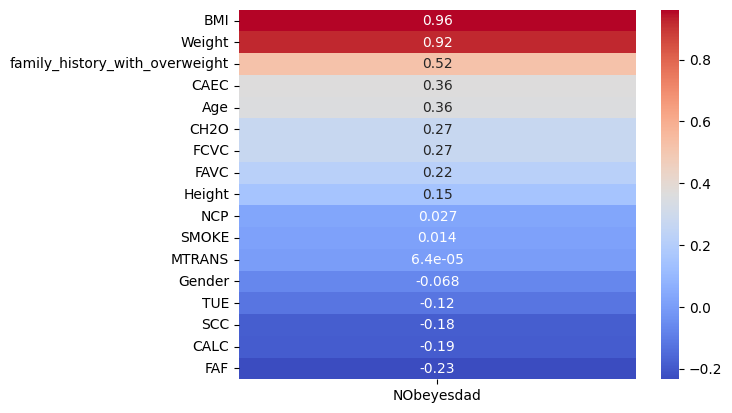

In [32]:
# The correlation to Obesity risk (Target)

target_cor = all_data.corr()['NObeyesdad'].drop(['NObeyesdad']).sort_values(ascending=False).to_frame()

sns.heatmap(target_cor,cmap="coolwarm", annot=True)

In [33]:
# Reform splits to train, test dataset

train = all_data[:len(df_train)]
test = all_data[len(df_train):]

test.drop('NObeyesdad', axis=1, inplace=True)

1. `train = all_data[:len(df_train)]`: This line creates a variable `train` which contains a portion of the `all_data` dataset. The `[:len(df_train)]` slice notation means it takes all rows from the beginning up to (but not including) the length of the `df_train` DataFrame. This effectively selects the rows of `all_data` that correspond to the training data.

2. `test = all_data[len(df_train):]`: This line creates a variable `test` which contains the remaining portion of the `all_data` dataset. The `[len(df_train):]` slice notation means it takes all rows starting from the index corresponding to the length of the `df_train` DataFrame until the end of the `all_data` DataFrame. This effectively selects the rows of `all_data` that correspond to the testing data.

3. `test.drop('NObeyesdad', axis=1, inplace=True)`: This line removes the column named `'NObeyesdad'` from the `test` DataFrame. The `drop()` function is used to drop specified labels from rows or columns. The parameter `axis=1` indicates that we are dropping a column, and `inplace=True` means the modification is done directly on the `test` DataFrame, so there's no need to assign the result back to `test`.

In summary, this code separates the original dataset `all_data` into a training set (`train`) and a testing set (`test`), and then removes the column `'NObeyesdad'` from the testing set. This process is often done before training a machine learning model to ensure that the model is trained on one set of data and tested on another set to evaluate its performance.

In [34]:
train.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
0       1  24.443011  1.699998   81.669950                               1   
1       0  18.000000  1.560000   57.000000                               1   
2       0  18.000000  1.711460   50.165754                               1   
3       0  20.952737  1.710730  131.274851                               1   
4       1  31.641081  1.914186   93.798055                               1   

   FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0     1  2.000000  2.983297     2      0  2.763573    0  0.000000  0.976473   
1     1  2.000000  3.000000     1      0  2.000000    0  1.000000  1.000000   
2     1  1.880534  1.411685     2      0  1.910378    0  0.866045  1.673584   
3     1  3.000000  3.000000     2      0  1.674061    0  1.467863  0.780199   
4     1  2.679664  1.971472     2      0  1.979848    0  1.967973  0.931721   

   CALC  MTRANS  NObeyesdad        BMI  
0     2       3         3.0  28.259565  
1     3       0         1.0  23.422091  
2     3       3         0.0  17.126706  
3     2       3         6.0  44.855798  
4     2       3         3.0  25.599151

In [35]:
# Define the features and target

X = train.drop('NObeyesdad', axis=1)

y = train['NObeyesdad']

In [36]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [37]:
X_train.head()

Gender        Age    Height      Weight  \
7320        0  21.037514  1.742901  132.940660   
11946       0  26.000000  1.650000   63.000000   
5370        1  22.720449  1.650000   98.790167   
1179        0  21.412434  1.748524  133.365094   
10598       1  18.000000  1.780000  108.000000   

       family_history_with_overweight  FAVC  FCVC       NCP  CAEC  SMOKE  \
7320                                1     1   3.0  3.000000     2      0   
11946                               1     0   3.0  3.000000     2      0   
5370                                1     1   2.0  2.675411     2      0   
1179                                1     1   3.0  3.000000     2      0   
10598                               1     1   2.0  3.000000     2      0   

           CH2O  SCC       FAF       TUE  CALC  MTRANS        BMI  
7320   1.827515    0  1.583832  0.582840     2       3  43.763535  
11946  2.000000    0  0.000000  2.000000     3       0  23.140496  
5370   2.094479    0  0.000000  1.355370     3       3  36.286563  
1179   1.716590    0  1.465931  0.711724     2       3  43.621338  
10598  1.000000    0  1.000000  1.000000     3       3  34.086605

# Model Creation by using Algorithms

In [38]:
# Decision tree

dt_model = DecisionTreeClassifier(max_depth=7)
dt_model.fit(X_train,y_train)

dt_predict = dt_model.predict(X_valid)

dt_score = accuracy_score(dt_predict,y_valid)

print(classification_report(y_valid,dt_predict))
print(confusion_matrix(y_valid,dt_predict))
print('The accuracy of Decision tree is',dt_score)


              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       478
         1.0       0.85      0.84      0.84       630
         2.0       0.69      0.72      0.71       472
         3.0       0.72      0.72      0.72       510
         4.0       0.80      0.82      0.81       582
         5.0       0.98      0.91      0.94       673
         6.0       0.99      0.99      0.99       807

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152

[[442  32   4   0   0   0   0]
 [ 43 529  54   2   2   0   0]
 [  2  56 342  66   5   0   1]
 [  0   8  79 367  54   1   1]
 [  1   0  16  69 480  14   2]
 [  0   0   2   6  49 615   1]
 [  0   0   0   0   7   0 800]]
The accuracy of Decision tree is 0.8610308285163777


1. **Importing Necessary Libraries:** The code likely imports the necessary libraries for machine learning, such as scikit-learn. However, the specific imports are not shown in the provided snippet.

2. **Decision Tree Initialization:**
   ```
   dt_model = DecisionTreeClassifier(max_depth=7)
   ```
   Here, a decision tree classifier is initialized with a maximum depth of 7. The `max_depth` parameter controls the maximum depth of the decision tree, which helps prevent overfitting by limiting the number of nodes in the tree.

3. **Fitting the Model:**
   ```
   dt_model.fit(X_train, y_train)
   ```
   The `fit` method is used to train the decision tree classifier on the training data (`X_train`) with corresponding labels (`y_train`). This step involves constructing the decision tree based on the provided training data.

4. **Making Predictions:**
   ```
   dt_predict = dt_model.predict(X_valid)
   ```
   After training the model, predictions are made on the validation data (`X_valid`) using the `predict` method. The predicted labels are stored in the variable `dt_predict`.

5. **Evaluating Model Performance:**
   ```
   dt_score = accuracy_score(dt_predict, y_valid)
   ```
   The `accuracy_score` function from scikit-learn is used to calculate the accuracy of the model's predictions (`dt_predict`) compared to the actual labels (`y_valid`). The resulting accuracy score is stored in the variable `dt_score`.

6. **Printing Evaluation Metrics:**
   ```
   print(classification_report(y_valid, dt_predict))
   print(confusion_matrix(y_valid, dt_predict))
   print('The accuracy of Decision tree is', dt_score)
   ```
   - The `classification_report` function generates a text report showing the main classification metrics, such as precision, recall, and F1-score, for each class in the validation data.
   - The `confusion_matrix` function computes the confusion matrix to evaluate the accuracy of classification. It shows the count of true positive, false positive, true negative, and false negative predictions.
   - Finally, the accuracy score calculated earlier is printed to show the overall accuracy of the decision tree model on the validation data.

Text(0.5, 1.0, 'Feature Importances from Decision Tree model')

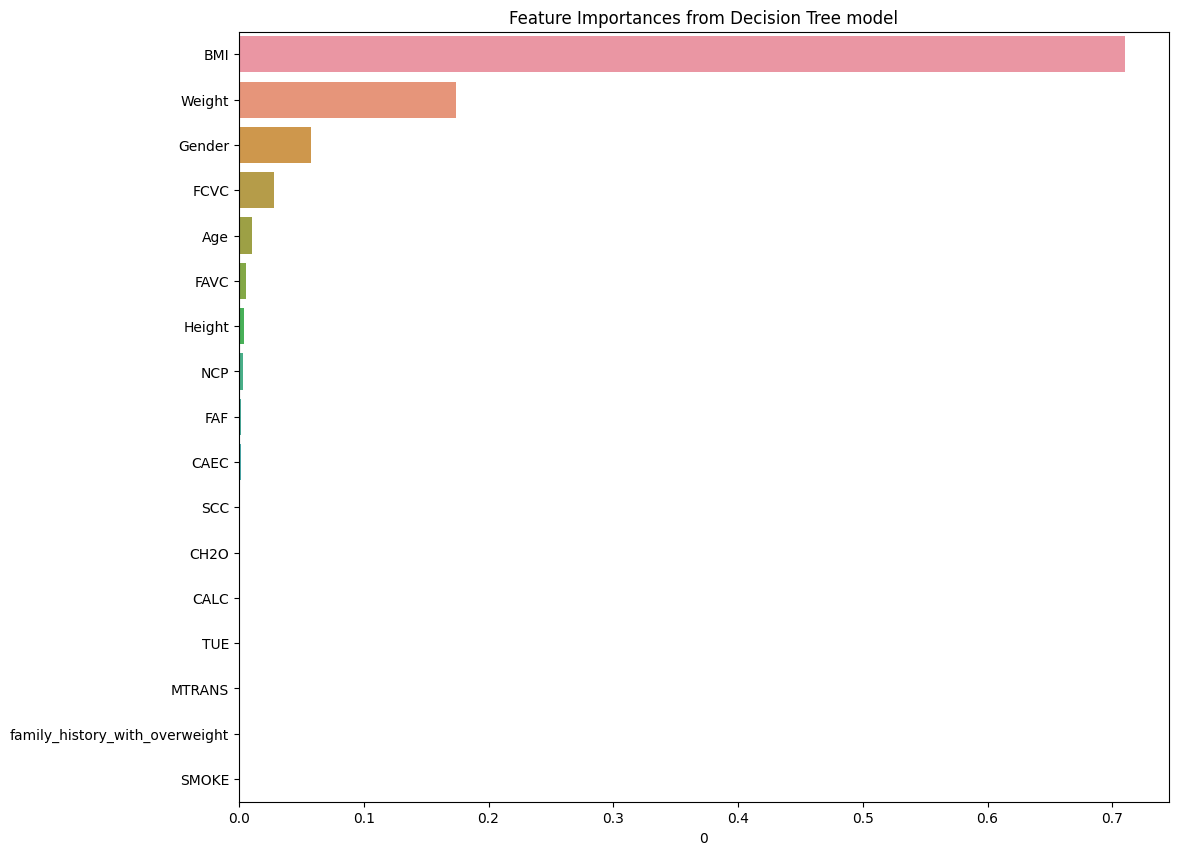

In [39]:
# Feature Importances

importances = pd.DataFrame(dt_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from Decision Tree model')

 1. `importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns)`: This line creates a DataFrame named `importances` where the feature importances from the Decision Tree model (`dt_model`) are stored. The `feature_importances_` attribute of a trained Decision Tree model provides the importance of each feature used in the model. These importances are indexed by the column names of the input features `X`.

2. `importances.sort_values(by=0, inplace=True, ascending=False)`: This line sorts the DataFrame `importances` by the values in column `0` (which holds the feature importances). The `ascending=False` parameter sorts the values in descending order. This sorts the features from most important to least important.

3. `plt.figure(figsize=(12, 10))`: This line creates a new figure for the plot with a specified figure size of 12 inches by 10 inches.

4. `sns.barplot(x=0, y=importances.index, data=importances)`: This line creates a bar plot using seaborn (`sns.barplot`). The feature importances are plotted on the y-axis (`y=importances.index`), and the values of the feature importances are plotted on the x-axis (`x=0`). The data source for this plot is the `importances` DataFrame.

5. `plt.title('Feature Importances from Decision Tree model')`: This line sets the title of the plot to 'Feature Importances from Decision Tree model'.

In summary, this code creates a bar plot to visualize the feature importances obtained from a Decision Tree model. The features are sorted in descending order based on their importance in predicting the target variable.

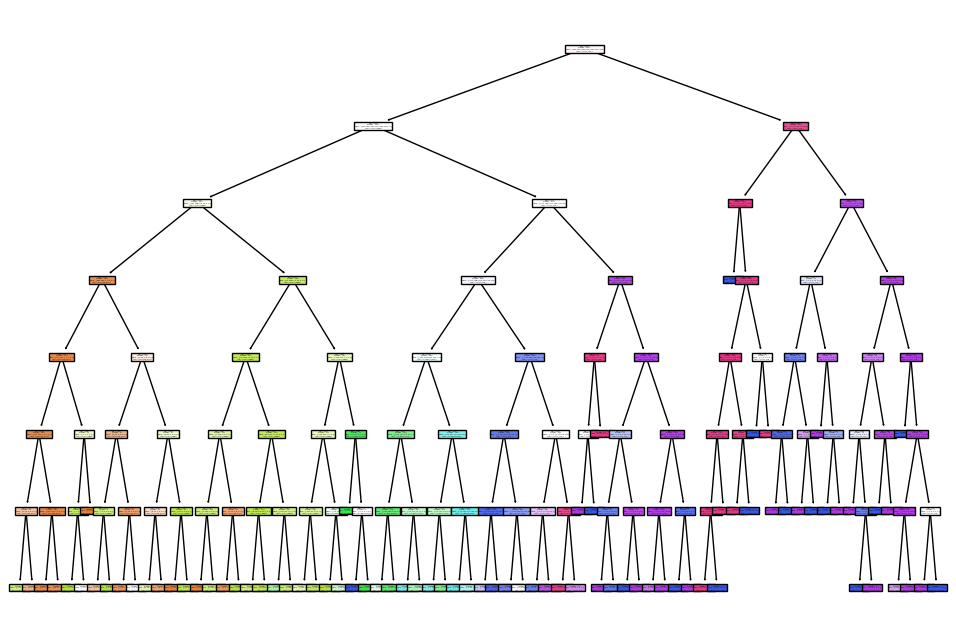

In [40]:
# Create Decision Tree Visualization

from sklearn import tree

feature_names = X_train.columns
target_names = order

fig = plt.figure(figsize=(12,8))

plot = tree.plot_tree(
    dt_model,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)

plt.show()

In [41]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

rf_predict = rf_model.predict(X_valid)

rf_score = accuracy_score(rf_predict,y_valid)
print(classification_report(y_valid,rf_predict))
print(confusion_matrix(y_valid,rf_predict))
print('The accuracy of Random Forest is',rf_score)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       478
         1.0       0.86      0.88      0.87       630
         2.0       0.78      0.76      0.77       472
         3.0       0.78      0.83      0.80       510
         4.0       0.90      0.86      0.88       582
         5.0       0.97      0.96      0.96       673
         6.0       1.00      1.00      1.00       807

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

[[444  30   4   0   0   0   0]
 [ 35 552  38   4   1   0   0]
 [  2  50 358  58   4   0   0]
 [  0   6  47 421  31   5   0]
 [  1   1  10  52 501  15   2]
 [  0   0   0   8  20 644   1]
 [  0   0   0   0   1   0 806]]
The accuracy of Random Forest is 0.8973988439306358


1. Import the required libraries:
   - `from sklearn.ensemble import RandomForestClassifier`: Importing the Random Forest classifier from the scikit-learn ensemble module.

2. Initialize the Random Forest classifier:
   - `rf_model = RandomForestClassifier()`: Create an instance of the RandomForestClassifier class. By default, this will create a Random Forest classifier with 100 decision trees. You can also specify hyperparameters such as the number of trees, maximum depth of trees, etc.

3. Train the Random Forest model:
   - `rf_model.fit(X_train, y_train)`: Train the Random Forest classifier using the training data `X_train` and corresponding labels `y_train`. This step involves building multiple decision trees based on different subsets of the training data.

4. Make predictions using the trained model:
   - `rf_predict = rf_model.predict(X_valid)`: Use the trained Random Forest model to make predictions on the validation data `X_valid`. This step predicts the class labels for the validation data based on the trained model.

5. Evaluate the model performance:
   - `rf_score = accuracy_score(rf_predict, y_valid)`: Calculate the accuracy of the Random Forest model by comparing the predicted labels `rf_predict` with the actual labels `y_valid` from the validation set. The `accuracy_score` function is used for this purpose.
   - `print(classification_report(y_valid, rf_predict))`: Print a classification report, which includes precision, recall, F1-score, and support for each class based on the predictions (`rf_predict`) and actual labels (`y_valid`).
   - `print(confusion_matrix(y_valid, rf_predict))`: Print the confusion matrix, which is a table that is often used to describe the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives.
   - `print('The accuracy of Random Forest is', rf_score)`: Print the accuracy of the Random Forest model on the validation data.

Overall, this code trains a Random Forest classifier on the training data, evaluates its performance on the validation data, and prints out the classification report, confusion matrix, and accuracy score.

Text(0.5, 1.0, 'Feature Importances from Random Forest model')

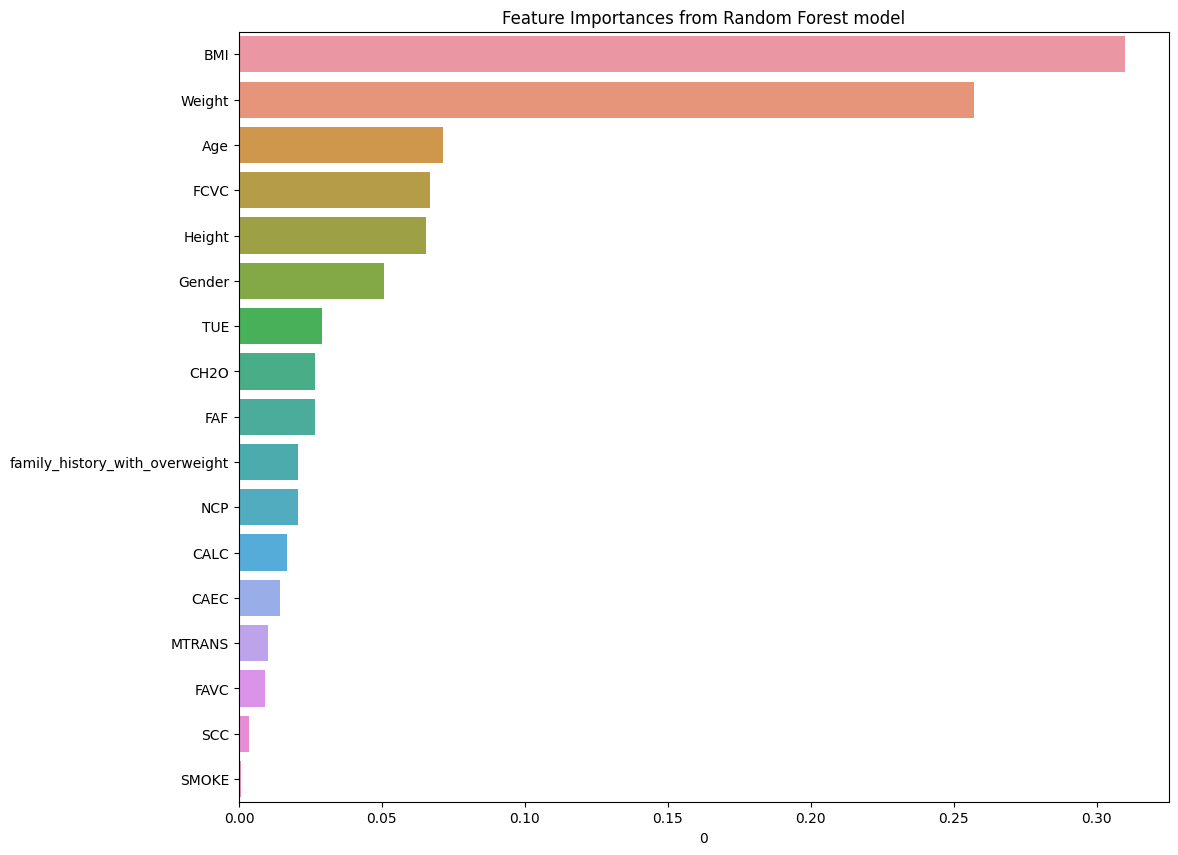

In [42]:
# Feature Importances

importances = pd.DataFrame(rf_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from Random Forest model')

In [43]:
# K-Nearest Neighbors

knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train,y_train)

knn_predict = knn_model.predict(X_valid)

knn_score = accuracy_score(knn_predict,y_valid)
print(classification_report(y_valid,knn_predict))
print(confusion_matrix(y_valid,knn_predict))
print('The accuracy of KNN is',knn_score)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       478
         1.0       0.86      0.81      0.84       630
         2.0       0.75      0.77      0.76       472
         3.0       0.75      0.81      0.78       510
         4.0       0.90      0.82      0.86       582
         5.0       0.95      0.94      0.95       673
         6.0       0.98      0.99      0.98       807

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152

[[446  28   4   0   0   0   0]
 [ 55 513  52  10   0   0   0]
 [  2  47 364  55   4   0   0]
 [  0   7  55 415  29   4   0]
 [  1   0  11  64 477  21   8]
 [  0   0   0   9  19 635  10]
 [  0   0   0   0   2   6 799]]
The accuracy of KNN is 0.8788535645472062


1. `knn_model = KNeighborsClassifier(n_neighbors=7)`: This line creates a KNN classifier object with 7 neighbors. KNN is a type of supervised learning algorithm that can be used for both classification and regression tasks. In this case, it's being used for classification.

2. `knn_model.fit(X_train,y_train)`: This line trains the KNN model using the training data `X_train` and corresponding labels `y_train`. Training involves the algorithm learning the relationship between the input features and the target labels.

3. `knn_predict = knn_model.predict(X_valid)`: This line uses the trained KNN model to make predictions on the validation data `X_valid`. The predicted labels are stored in the variable `knn_predict`.

4. `knn_score = accuracy_score(knn_predict,y_valid)`: This line calculates the accuracy of the KNN model by comparing its predictions `knn_predict` with the actual labels in the validation set `y_valid`. The accuracy score is a measure of how many predictions were correct out of the total number of predictions.

5. `print(classification_report(y_valid,knn_predict))`: This line prints a classification report, which provides precision, recall, F1-score, and support for each class in the validation data. It gives insight into the performance of the classifier across different classes.

6. `print(confusion_matrix(y_valid,knn_predict))`: This line prints the confusion matrix, which is a table that summarizes the performance of a classification algorithm. It shows the number of true positives, true negatives, false positives, and false negatives.

7. `print('The accuracy of KNN is',knn_score)`: This line prints the accuracy of the KNN model calculated earlier.

Overall, this code trains a KNN classifier, evaluates its performance on a validation set, and then prints out various evaluation metrics such as accuracy, classification report, and confusion matrix.

In [44]:
# Naive Bayes Classifier

nb_model = GaussianNB()

nb_model.fit(X_train,y_train)

nb_predict = nb_model.predict(X_valid)

nb_score = accuracy_score(nb_predict,y_valid)
print(classification_report(y_valid,nb_predict))
print(confusion_matrix(y_valid,nb_predict))
print('The accuracy of Naive Bayes Classification is',nb_score)

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87       478
         1.0       0.83      0.68      0.75       630
         2.0       0.66      0.49      0.56       472
         3.0       0.56      0.62      0.59       510
         4.0       0.69      0.68      0.68       582
         5.0       0.83      0.94      0.88       673
         6.0       0.97      1.00      0.98       807

    accuracy                           0.78      4152
   macro avg       0.76      0.76      0.76      4152
weighted avg       0.78      0.78      0.78      4152

[[451  23   2   1   0   0   1]
 [106 426  62  22   1   0  13]
 [  4  46 231 163  23   0   5]
 [  0  17  44 316 118  14   1]
 [  1   1  11  53 394 118   4]
 [  0   0   2   5  33 633   0]
 [  0   0   0   0   3   0 804]]
The accuracy of Naive Bayes Classification is 0.7839595375722543


1. `nb_model = GaussianNB()`: This line initializes a Gaussian Naive Bayes model. Naive Bayes is a probabilistic classifier that assumes independence between features. The Gaussian variant assumes that features follow a normal (Gaussian) distribution.

2. `nb_model.fit(X_train, y_train)`: This line trains the Naive Bayes model on the training data `X_train`, which contains features, and `y_train`, which contains corresponding labels.

3. `nb_predict = nb_model.predict(X_valid)`: This line uses the trained Naive Bayes model to make predictions on the validation data `X_valid`. It predicts the labels for the validation data based on the learned patterns from the training data.

4. `nb_score = accuracy_score(nb_predict, y_valid)`: This line calculates the accuracy of the Naive Bayes classifier by comparing the predicted labels `nb_predict` with the actual labels `y_valid` from the validation data. The `accuracy_score` function is used for this purpose.

5. `print(classification_report(y_valid, nb_predict))`: This line prints a classification report, which includes metrics such as precision, recall, and F1-score, for each class in the validation data. It provides a more detailed evaluation of the classifier's performance.

6. `print(confusion_matrix(y_valid, nb_predict))`: This line prints the confusion matrix for the validation predictions. The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions, which helps evaluate the classifier's performance in more detail.

7. `print('The accuracy of Naive Bayes Classification is', nb_score)`: This line prints out the accuracy of the Naive Bayes classifier on the validation data.

Overall, this code trains a Gaussian Naive Bayes classifier on the training data, evaluates its performance on the validation data, and prints out various evaluation metrics including accuracy, precision, recall, and the confusion matrix.

In [45]:
# Light Gradient Boosting Machine

lgbm_model = LGBMClassifier()

lgbm_model.fit(X_train,y_train)

lgbm_predict = lgbm_model.predict(X_valid)

lgbm_score = accuracy_score(lgbm_predict,y_valid)
print(classification_report(y_valid,lgbm_predict))
print(confusion_matrix(y_valid,lgbm_predict))
print('The accuracy of Light Gradient Boosting Machine is',lgbm_score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2307
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 17
[LightGBM] [Info] Start training from score -2.094366
[LightGBM] [Info] Start training from score -1.912860
[LightGBM] [Info] Start training from score -2.139374
[LightGBM] [Info] Start training from score -2.110635
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.863915
[LightGBM] [Info] Start training from score -1.634499
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       478
         1.0       0.87      0.87      0.87       630
         2.0       0.77      0.76      0.77       472
         3.0       0.79      0.83      0.80       51

1. **Import Libraries**: The code likely starts with importing necessary libraries, including at least `LGBMClassifier` from the `lightgbm` package, `accuracy_score`, `classification_report`, and `confusion_matrix` from the `sklearn.metrics` package.

2. **Instantiate the Model**: An instance of the `LGBMClassifier` class is created without specifying any hyperparameters. This initializes the LightGBM model with default settings.

    ```python
    lgbm_model = LGBMClassifier()
    ```

3. **Model Training**: The model is trained using the `fit` method with the training data (`X_train` and `y_train`).

    ```python
    lgbm_model.fit(X_train, y_train)
    ```

4. **Prediction on Validation Data**: The trained model is then used to make predictions on the validation dataset (`X_valid`), and the predicted labels are stored in `lgbm_predict`.

    ```python
    lgbm_predict = lgbm_model.predict(X_valid)
    ```

5. **Evaluation Metrics**: Various evaluation metrics are computed to assess the performance of the model on the validation set. 
   
   - **Classification Report**: Provides a summary of different evaluation metrics such as precision, recall, F1-score, and support for each class.
   
   - **Confusion Matrix**: Shows the counts of true positive, true negative, false positive, and false negative predictions.
   
   - **Accuracy Score**: Computes the accuracy of the model on the validation set.

    ```python
    lgbm_score = accuracy_score(lgbm_predict, y_valid)
    print(classification_report(y_valid, lgbm_predict))
    print(confusion_matrix(y_valid, lgbm_predict))
    print('The accuracy of Light Gradient Boosting Machine is', lgbm_score)
    ```

6. **Print Results**: The classification report, confusion matrix, and accuracy score are printed to the console.

In summary, this code trains an LGBM model, evaluates its performance on a validation dataset, and prints out various evaluation metrics to assess its effectiveness.

Text(0.5, 1.0, 'Feature Importances from LGBM model')

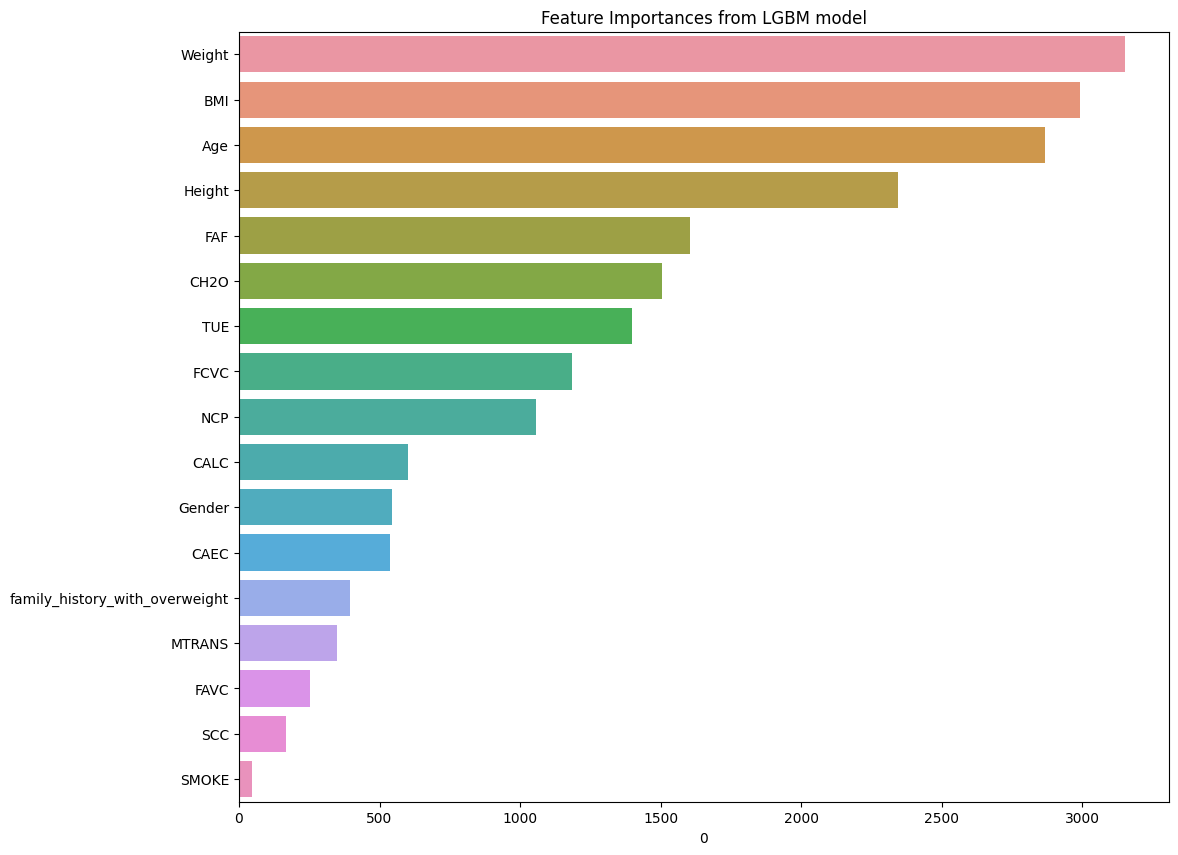

In [46]:
# Feature Importances

importances = pd.DataFrame(lgbm_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from LGBM model')

In [47]:
# eXtream Gradient Boosting 

xgb_model = XGBClassifier()

xgb_model.fit(X_train,y_train)

xgb_predict = xgb_model.predict(X_valid)

xgb_score = accuracy_score(xgb_predict,y_valid)
print(classification_report(y_valid,xgb_predict))
print(confusion_matrix(y_valid,xgb_predict))
print('The accuracy of eXtream Gradient Boosting is',xgb_score)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       478
         1.0       0.87      0.88      0.88       630
         2.0       0.80      0.77      0.78       472
         3.0       0.80      0.84      0.82       510
         4.0       0.90      0.87      0.89       582
         5.0       0.97      0.96      0.96       673
         6.0       0.99      1.00      1.00       807

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

[[445  29   4   0   0   0   0]
 [ 32 557  37   3   1   0   0]
 [  2  48 362  55   5   0   0]
 [  0   7  42 427  31   3   0]
 [  1   2  10  41 509  16   3]
 [  0   0   0   9  16 645   3]
 [  0   0   0   0   1   0 806]]
The accuracy of eXtream Gradient Boosting is 0.9034200385356455


1. **Importing Libraries**: Before running this code, you need to have the required libraries imported. It appears that the code relies on the `XGBClassifier` class from the XGBoost library. Other libraries such as `accuracy_score`, `classification_report`, and `confusion_matrix` from scikit-learn might also be used.

2. **Initializing the XGBoost Classifier**: `xgb_model = XGBClassifier()` initializes an instance of the XGBoost classifier. The XGBoost library is a popular implementation of gradient boosting.

3. **Training the Model**: `xgb_model.fit(X_train,y_train)` trains the XGBoost classifier using the training data `X_train` and corresponding labels `y_train`. This step involves iteratively building an ensemble of weak learners, typically decision trees, to minimize the overall loss.

4. **Making Predictions**: `xgb_predict = xgb_model.predict(X_valid)` uses the trained model to make predictions on the validation dataset `X_valid`.

5. **Evaluating Performance**: 
   - `xgb_score = accuracy_score(xgb_predict,y_valid)` calculates the accuracy of the predictions by comparing `xgb_predict` (the predictions made by the model) with the actual labels `y_valid` of the validation dataset using the `accuracy_score` function.
   - `print(classification_report(y_valid,xgb_predict))` prints a classification report which includes precision, recall, F1-score, and support for each class. It's a useful summary of prediction performance.
   - `print(confusion_matrix(y_valid,xgb_predict))` prints the confusion matrix which shows the counts of true positive, true negative, false positive, and false negative predictions. It helps in understanding the model's behavior across different classes.
   - `print('The accuracy of eXtreme Gradient Boosting is',xgb_score)` prints the accuracy score calculated earlier.

Overall, this code trains an XGBoost classifier, evaluates its performance on a validation dataset, and prints out various metrics to assess how well the classifier is performing.

Text(0.5, 1.0, 'Feature Importances from XGB model')

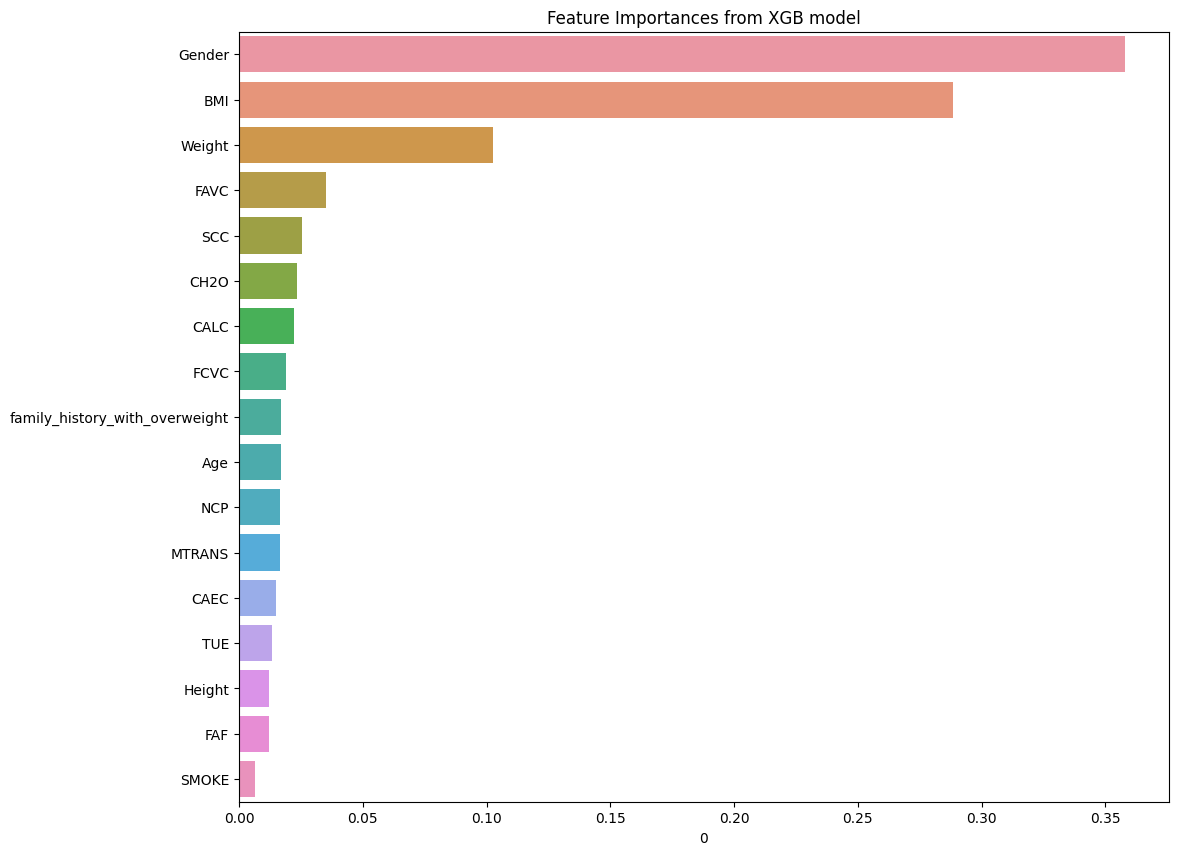

In [48]:
# Feature Importances

importances = pd.DataFrame(xgb_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from XGB model')

Text(0.5, 1.0, 'XGB')

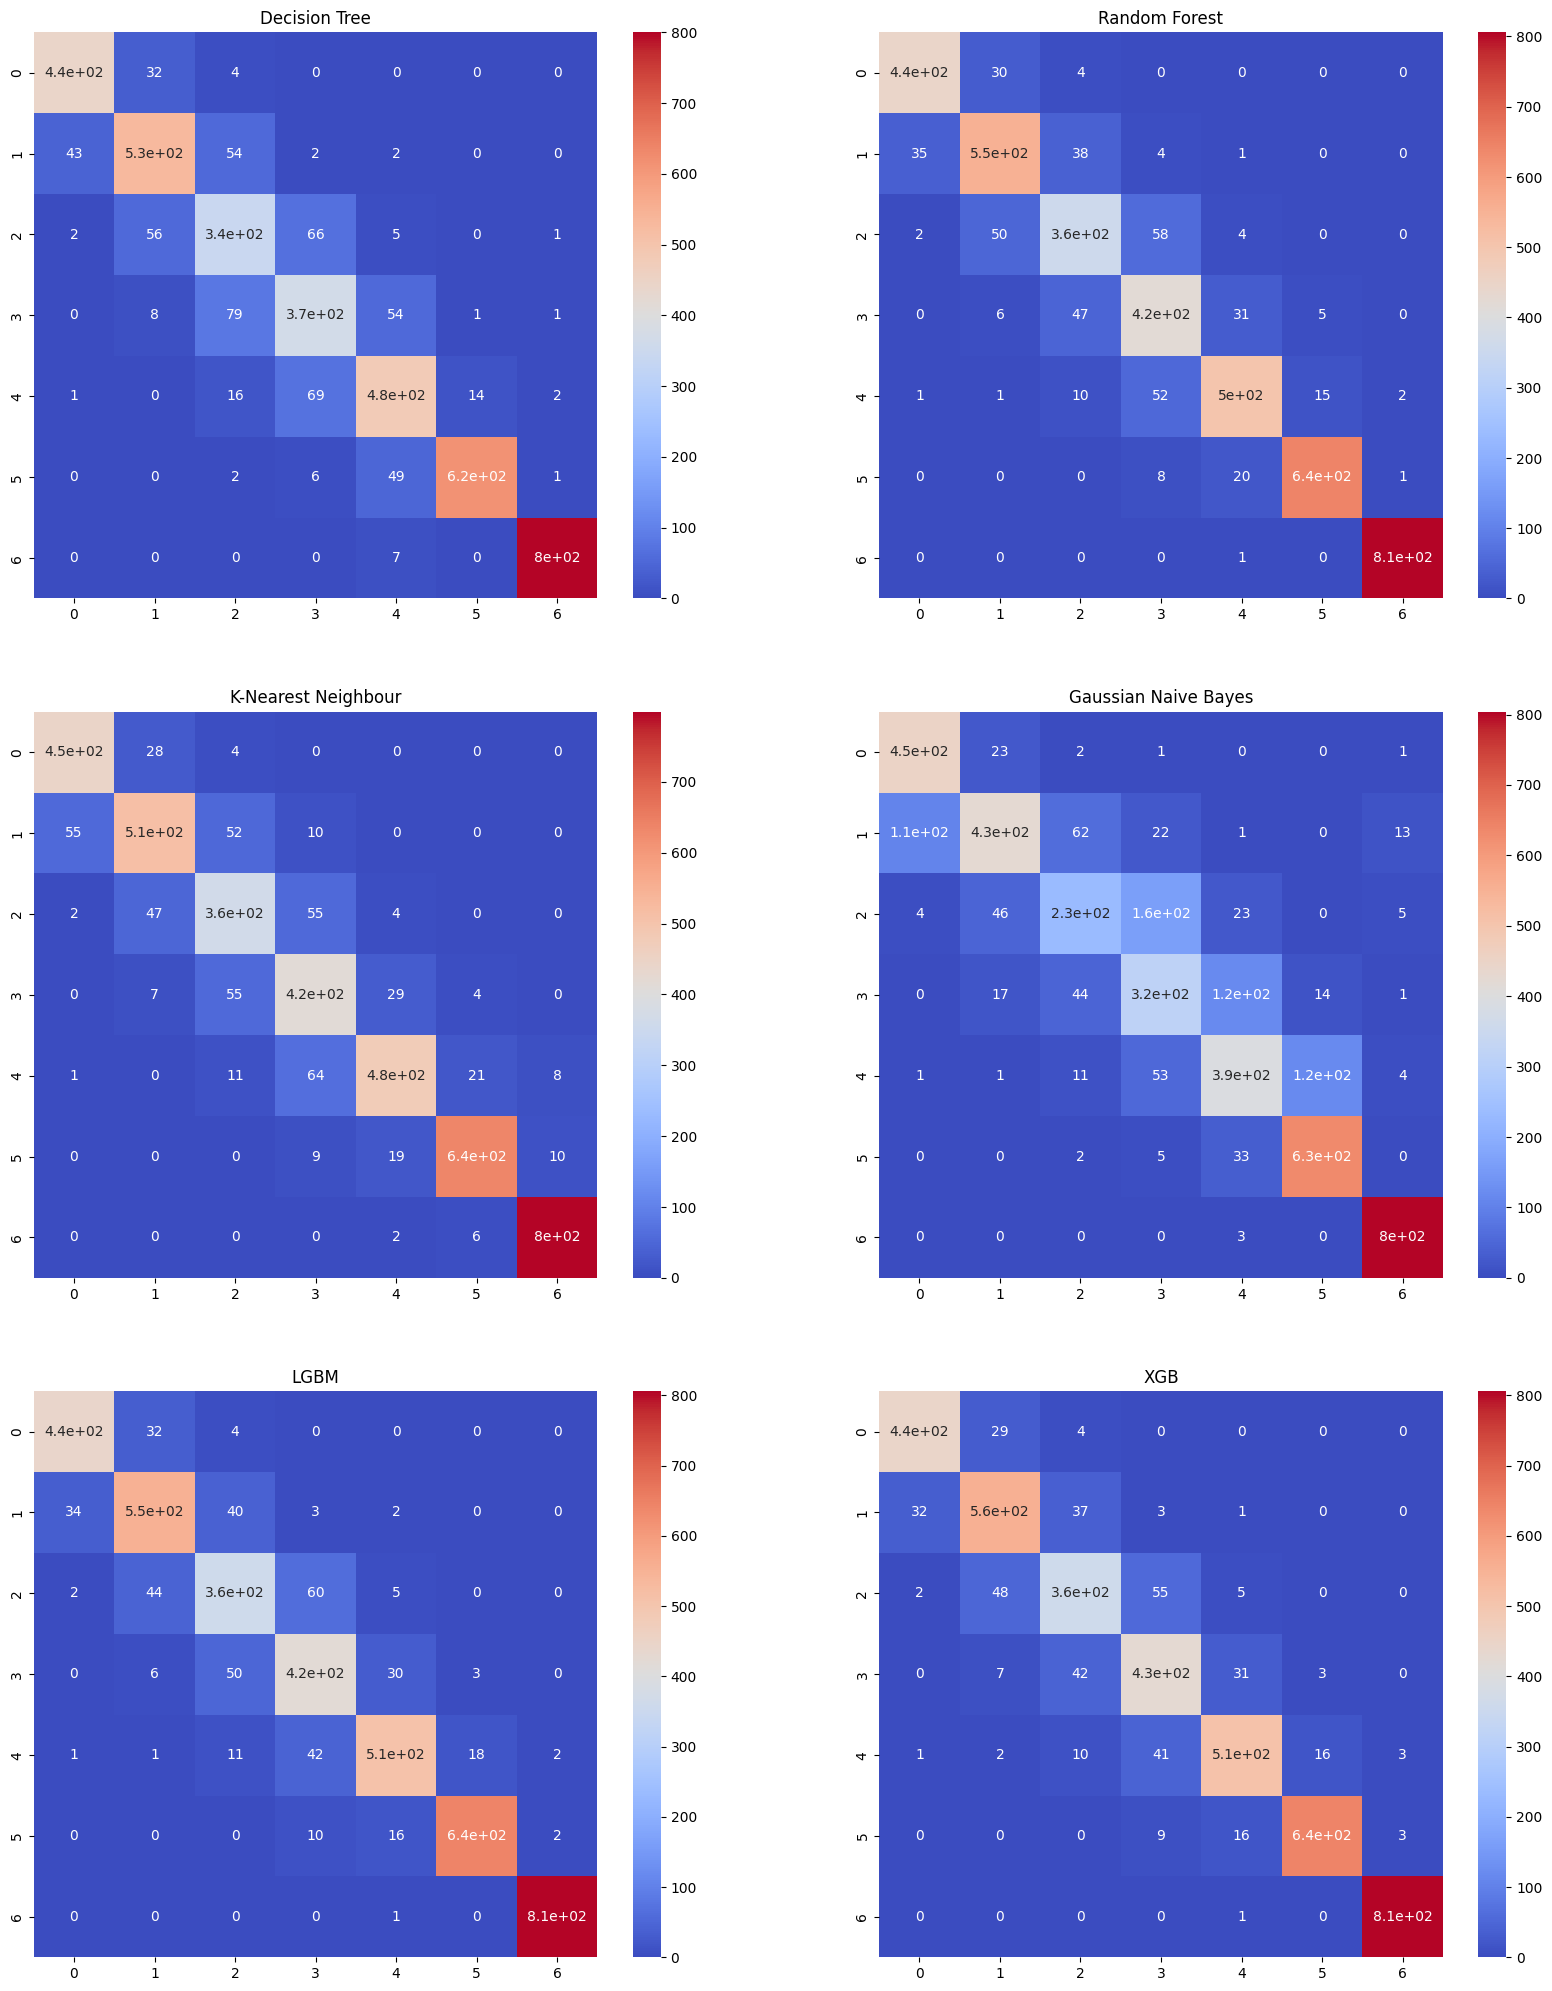

In [49]:
# Visualisation of Confusion Matrix compare between each model

fig, ax  = plt.subplots(3,2, figsize = (20,25))

sns.heatmap(confusion_matrix(y_valid, dt_predict), annot = True, cmap = 'coolwarm', ax = ax[0,0]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_valid, rf_predict), annot = True, cmap = 'coolwarm', ax = ax[0,1]).set_title('Random Forest')
sns.heatmap(confusion_matrix(y_valid, knn_predict), annot = True, cmap = 'coolwarm', ax = ax[1,0]).set_title('K-Nearest Neighbour')
sns.heatmap(confusion_matrix(y_valid, nb_predict), annot = True, cmap = 'coolwarm', ax = ax[1,1]).set_title('Gaussian Naive Bayes')
sns.heatmap(confusion_matrix(y_valid, lgbm_predict), annot = True, cmap = 'coolwarm', ax = ax[2,0]).set_title('LGBM')
sns.heatmap(confusion_matrix(y_valid, xgb_predict), annot = True, cmap = 'coolwarm', ax = ax[2,1]).set_title('XGB')

1. `fig, ax = plt.subplots(3, 2, figsize=(20, 25))`: This line creates a figure with 3 rows and 2 columns of subplots, allowing for visualizing the confusion matrices of six different models. `fig` is the overall figure object, and `ax` is an array of AxesSubplot objects representing each subplot.

2. `sns.heatmap(confusion_matrix(y_valid, dt_predict), annot=True, cmap='coolwarm', ax=ax[0, 0]).set_title('Decision Tree')`: This line creates a heatmap of the confusion matrix for the decision tree model (`dt_predict`) using Seaborn's heatmap function. The confusion matrix is calculated based on the true labels (`y_valid`) and the predicted labels (`dt_predict`). The `annot=True` argument adds numerical annotations to the heatmap cells. The colormap is set to 'coolwarm'. The resulting heatmap is placed in the first subplot (0th row, 0th column), and its title is set to 'Decision Tree'.

3. Similar lines follow for other models (`Random Forest`, `K-Nearest Neighbour`, `Gaussian Naive Bayes`, `LGBM`, and `XGB`), each plotting their respective confusion matrices on different subplots with appropriate titles.

The confusion matrix is a performance measurement for classification problems. It is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It compares the actual target values with those predicted by the model. Each cell in the matrix represents the count of instances predicted to belong to a particular class compared to the actual class.

In [50]:
# Compare model accuracy

compare = pd.DataFrame({'Model': ['Decision Tree',
                                  'Random Forest',
                                  'K-Nearest Neighbour',
                                  'Gaussian Naive Bayes', 
                                  'LGBM',
                                  'XGB'], 
                        'Accuracy': [dt_score,
                                     rf_score,
                                     knn_score,
                                     nb_score,
                                     lgbm_score,
                                     xgb_score
                                    ]})

compare.sort_values(by = 'Accuracy', ascending = False)

Model  Accuracy
5                   XGB  0.903420
4                  LGBM  0.899085
1         Random Forest  0.897399
2   K-Nearest Neighbour  0.878854
0         Decision Tree  0.861031
3  Gaussian Naive Bayes  0.783960

1. A DataFrame named `compare` is created using Pandas. It consists of two columns: 'Model' and 'Accuracy'. 'Model' contains the names of different machine learning models, and 'Accuracy' contains their corresponding accuracy scores.

2. The accuracy scores of various machine learning models are stored in variables such as `dt_score`, `rf_score`, `knn_score`, etc.

3. These accuracy scores are then used to populate the 'Accuracy' column in the DataFrame `compare`.

4. The `compare.sort_values()` function is called to sort the DataFrame by the 'Accuracy' column in descending order (`ascending = False`). However, it seems like the result of sorting is not assigned to any variable or printed out, so the sorted DataFrame is not being stored or displayed.

If you want to see the sorted DataFrame, you should either assign the result of the sorting operation to a variable or print it out. For example:

```python
sorted_compare = compare.sort_values(by='Accuracy', ascending=False)
print(sorted_compare)
```

This will sort the DataFrame by accuracy and print it out.

# Hyper-Parameter Tuning

In [51]:
xgb_best_params = {'n_estimators': 1312,
                   'learning_rate': 0.018279520260162645,
                   'gamma': 0.0024196354156454324,
                   'reg_alpha': 0.9025931173755949,
                   'reg_lambda': 0.06835667255875388,
                   'max_depth': 5,
                   'min_child_weight': 5,
                   'subsample': 0.883274050086088,
                   'colsample_bytree': 0.6579828557036317}

xgb_tune = XGBClassifier(**xgb_best_params)

xgb_tune.fit(X,y)

xgb_cv =cross_val_score(xgb_tune,X,y, cv = 5,scoring = "accuracy").mean()
xgb_cv

0.9100588501784049

1. `xgb_best_params`: This dictionary contains the best hyperparameters found through some tuning process. Each hyperparameter represents a different aspect of the XGBoost model and its configuration. Here are the hyperparameters and their meanings:
   - `n_estimators`: The number of trees in the ensemble.
   - `learning_rate`: The rate at which the model learns from the data.
   - `gamma`: Minimum loss reduction required to make a further partition on a leaf node of the tree.
   - `reg_alpha`: L1 regularization term on weights.
   - `reg_lambda`: L2 regularization term on weights.
   - `max_depth`: Maximum depth of a tree.
   - `min_child_weight`: Minimum sum of instance weight needed in a child.
   - `subsample`: Subsample ratio of the training instance.
   - `colsample_bytree`: Subsample ratio of columns when constructing each tree.

2. `xgb_tune`: This line initializes an XGBoost classifier with the best parameters found (`xgb_best_params`). It creates an XGBoost classifier object with these parameters.

3. `xgb_tune.fit(X, y)`: This line fits the XGBoost classifier to the training data `X` and corresponding labels `y`. It trains the model on the provided dataset.

4. `xgb_cv = cross_val_score(xgb_tune, X, y, cv=5, scoring="accuracy").mean()`: This line performs cross-validation on the XGBoost classifier using the training data `X` and labels `y`. It uses 5-fold cross-validation (`cv=5`) and evaluates the model's accuracy using the scoring metric "accuracy". The `.mean()` method computes the mean accuracy across all folds.

5. `xgb_cv`: This variable holds the mean cross-validated accuracy of the XGBoost classifier.

Overall, the code tunes the hyperparameters of an XGBoost classifier, trains the tuned model on the provided data, and evaluates its performance using cross-validation.

In [52]:
lgbm_best_params = {'objective': 'multiclass',    
                    'metric': 'multi_logloss',                   
                    'boosting_type': 'gbdt', 
                    'verbosity': -1,        
                    'random_state': 42,       
                    'num_class': 7,  
                    'learning_rate': 0.031246890512640613, 
                    'n_estimators': 580, 
                    'lambda_l1': 0.006715252190260552, 
                    'lambda_l2': 0.03541257240056438, 
                    'max_depth': 9, 
                    'colsample_bytree': 0.30827855982934693, 
                    'subsample': 0.9572214961677402, 
                    'min_child_samples': 29
                   }

lgbm_tune = LGBMClassifier(**lgbm_best_params)

lgbm_tune.fit(X,y)

lgbm_cv =cross_val_score(lgbm_tune,X,y, cv = 5,scoring = "accuracy").mean()
lgbm_cv

0.9092881140603118

1. `lgbm_best_params`: This dictionary contains the hyperparameters that are tuned and found to be the best for the LightGBM model. These hyperparameters are set based on some optimization process, such as grid search or randomized search.

2. `LGBMClassifier(**lgbm_best_params)`: This line creates an instance of the LightGBM classifier with the best parameters (`lgbm_best_params`). The `**` operator is used to unpack the dictionary, passing each key-value pair as a separate argument to the `LGBMClassifier` constructor.

3. `lgbm_tune.fit(X, y)`: This line fits the LightGBM classifier to the training data `X` and corresponding labels `y`. It trains the model using the training dataset.

4. `lgbm_cv = cross_val_score(lgbm_tune, X, y, cv=5, scoring="accuracy").mean()`: This line performs cross-validation on the trained LightGBM model (`lgbm_tune`). Cross-validation is a technique used to evaluate the performance of a machine learning model. In this case, 5-fold cross-validation is used (`cv=5`), meaning the dataset is divided into 5 equal parts, and the model is trained and tested 5 times, each time using a different part as the test set. The `scoring="accuracy"` parameter specifies that accuracy is used as the evaluation metric. The `.mean()` function calculates the mean accuracy across all the cross-validation folds.

5. `lgbm_cv`: This variable stores the mean cross-validated accuracy of the LightGBM model. It represents an estimate of how well the model is expected to perform on unseen data.

In [53]:
#It will get the best parameter for the model

rf_best_params = {'n_estimators': 230, 
                  'max_depth': 28,
                  'min_samples_leaf':2,
                  'min_samples_split':2 }

rf_tune = RandomForestClassifier(**rf_best_params) 

rf_tune.fit(X,y)

rf_cv = cross_val_score(rf_tune,X,y, cv = 5,scoring = "accuracy").mean()
rf_cv

0.9009540728630983

1. `rf_best_params`: This dictionary contains the hyperparameters that have been determined to be the best for the Random Forest model. These hyperparameters include the number of estimators (`n_estimators`), maximum depth of each tree (`max_depth`), minimum number of samples required to be at a leaf node (`min_samples_leaf`), and the minimum number of samples required to split an internal node (`min_samples_split`).

2. `rf_tune`: This line initializes a Random Forest classifier with the hyperparameters specified in `rf_best_params`. The `**` syntax is used to unpack the dictionary and pass its contents as keyword arguments to the `RandomForestClassifier` constructor.

3. `rf_tune.fit(X,y)`: This line fits the Random Forest classifier to the training data `X` and corresponding target labels `y`, essentially training the model.

4. `rf_cv`: This line computes the cross-validated accuracy of the Random Forest classifier using 5-fold cross-validation (`cv = 5`). The `cross_val_score` function from scikit-learn is used for this purpose. The `scoring` parameter specifies that we want to evaluate the model's accuracy.

5. `.mean()`: This method computes the mean of the accuracy scores obtained from cross-validation, providing a single value that represents the overall performance of the model.

Overall, this code is performing hyperparameter tuning for a Random Forest classifier and then evaluating its performance using cross-validation to get an estimate of how well it might generalize to unseen data.

In [54]:
# Compare model after Hyperparameter tuning

scores_list=[]

scores_list = [["XGB",xgb_cv],
               ["LGBM",lgbm_cv],
               ["RF",rf_cv], 
              ]

scores = (pd.DataFrame(scores_list,columns = ["Model", "CV Mean"])).sort_values(by=["CV Mean"], ascending=False )

scores

Model   CV Mean
0   XGB  0.910059
1  LGBM  0.909288
2    RF  0.900954

1. `scores_list=[]`: This initializes an empty list called `scores_list`.

2. `scores_list = [["XGB",xgb_cv], ["LGBM",lgbm_cv], ["RF",rf_cv]]`: This populates the `scores_list` with lists containing model names ("XGB" for XGBoost, "LGBM" for LightGBM, and "RF" for Random Forest) along with their corresponding cross-validation scores (`xgb_cv`, `lgbm_cv`, and `rf_cv` respectively).

3. `scores = (pd.DataFrame(scores_list,columns = ["Model", "CV Mean"])).sort_values(by=["CV Mean"], ascending=False)`: This converts the `scores_list` into a pandas DataFrame with columns "Model" and "CV Mean" (where "CV Mean" refers to the cross-validation mean scores). Then it sorts the DataFrame by the "CV Mean" column in descending order.

4. `scores`: Finally, this line prints or returns the DataFrame `scores`, which contains the model names along with their corresponding mean cross-validation scores, sorted in descending order of mean scores.

So, this code is organizing the cross-validation results of different models into a DataFrame and sorting them to compare the models' performances after hyperparameter tuning.

# Voting Classifier

In [55]:
# Define estimators
estimators = [('LGBM',lgbm_tune),
              ('XGB', xgb_tune),
              #('RF',rf_tune)
             ]

voting_model = VotingClassifier(estimators=estimators,
                                voting='soft')

voting_soft = voting_model.fit(X, y)

voting_cv = cross_val_score(voting_model,X,y, cv = 5,
                            scoring = "accuracy").mean()

voting_cv

0.9104441834244736

In [56]:
voting_predict = voting_model.predict(test)

# Final Submission of Data

In [57]:
# Create a submission file

submission_df = pd.DataFrame({'id': sample_submission['id'],
                              'NObeyesdad': voting_predict})

unmapping = {0:'Insufficient_Weight',
             1:'Normal_Weight',
             2:'Overweight_Level_I',
             3:'Overweight_Level_II',
             4:'Obesity_Type_I',
             5:'Obesity_Type_II',
             6:'Obesity_Type_III',
             }
    
submission_df['NObeyesdad'] = submission_df['NObeyesdad'].map(unmapping)

submission_df.to_csv('submission.csv', index=False)

submission_df.head(10)

id           NObeyesdad
0  20758      Obesity_Type_II
1  20759   Overweight_Level_I
2  20760     Obesity_Type_III
3  20761       Obesity_Type_I
4  20762     Obesity_Type_III
5  20763  Insufficient_Weight
6  20764  Insufficient_Weight
7  20765        Normal_Weight
8  20766  Overweight_Level_II
9  20767        Normal_Weight

1. `submission_df = pd.DataFrame({'id': sample_submission['id'], 'NObeyesdad': voting_predict})`: This line creates a DataFrame called `submission_df`. It contains two columns: 'id' and 'NObeyesdad'. The 'id' column is populated with the ids from a DataFrame called `sample_submission`, while the 'NObeyesdad' column is populated with predictions stored in a variable called `voting_predict`.

2. `unmapping = {0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I', 3:'Overweight_Level_II', 4:'Obesity_Type_I', 5:'Obesity_Type_II', 6:'Obesity_Type_III'}`: This line creates a dictionary called `unmapping` which maps numerical labels to their corresponding classes or categories.

3. `submission_df['NObeyesdad'] = submission_df['NObeyesdad'].map(unmapping)`: This line maps the numerical predictions in the 'NObeyesdad' column to their corresponding classes using the `unmapping` dictionary.

4. `submission_df.to_csv('submission.csv', index=False)`: This line exports the DataFrame `submission_df` to a CSV file named 'submission.csv' without including the index column.

5. `submission_df.head(10)`: This line displays the first 10 rows of the DataFrame `submission_df`.

Overall, this code prepares a submission file for a machine learning model's predictions, converting numerical predictions to their corresponding class labels and saving the results to a CSV file.